In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.impute import SimpleImputer
from sklearn import metrics
from sklearn.metrics import roc_curve, auc

from sklearn.cluster import KMeans, DBSCAN 
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split 
from sklearn.metrics import silhouette_score
from yellowbrick.cluster import SilhouetteVisualizer

from mlxtend.feature_selection import SequentialFeatureSelector

import statsmodels.api as SM
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import (RandomForestClassifier, AdaBoostClassifier, BaggingClassifier, GradientBoostingClassifier)
from sklearn.svm import SVC 
from xgboost import XGBClassifier

from imblearn.over_sampling import SMOTE
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV 

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor

from sklearn.metrics import ConfusionMatrixDisplay

In [2]:
from sklearn.metrics import (
    f1_score,
    accuracy_score,
    recall_score,
    precision_score,
    confusion_matrix,
    roc_auc_score,
    precision_recall_curve,
    roc_curve,
    make_scorer,
    confusion_matrix,
    classification_report,

)

In [3]:
import warnings

warnings.filterwarnings('ignore')

## Loading the dataset

In [4]:
data = pd.read_excel('Customer_Churn_Data.xlsx')
df = data.copy()

In [5]:
df.head()

,AccountID,Churn,Tenure,City_Tier,CC_Contacted_LY,Payment,Gender,Service_Score,Account_user_count,account_segment,CC_Agent_Score,Marital_Status,rev_per_month,Complain_ly,rev_growth_yoy,coupon_used_for_payment,Day_Since_CC_connect,cashback,Login_device
0,20000,1,4,3.0,6.0,Debit Card,Female,3.0,3,Super,2.0,Single,9,1.0,11,1,5,159.93,Mobile
1,20001,1,0,1.0,8.0,UPI,Male,3.0,4,Regular Plus,3.0,Single,7,1.0,15,0,0,120.9,Mobile
2,20002,1,0,1.0,30.0,Debit Card,Male,2.0,4,Regular Plus,3.0,Single,6,1.0,14,0,3,NaN,Mobile
3,20003,1,0,3.0,15.0,Debit Card,Male,2.0,4,Super,5.0,Single,8,0.0,23,0,3,134.07,Mobile
4,20004,1,0,1.0,12.0,Credit Card,Male,2.0,3,Regular Plus,5.0,Single,3,0.0,11,1,3,129.6,Mobile


## Overview of the dataset

In [6]:
df.shape

(11260, 19)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11260 entries, 0 to 11259
Data columns (total 19 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   AccountID                11260 non-null  int64  
 1   Churn                    11260 non-null  int64  
 2   Tenure                   11158 non-null  object 
 3   City_Tier                11148 non-null  float64
 4   CC_Contacted_LY          11158 non-null  float64
 5   Payment                  11151 non-null  object 
 6   Gender                   11152 non-null  object 
 7   Service_Score            11162 non-null  float64
 8   Account_user_count       11148 non-null  object 
 9   account_segment          11163 non-null  object 
 10  CC_Agent_Score           11144 non-null  float64
 11  Marital_Status           11048 non-null  object 
 12  rev_per_month            11158 non-null  object 
 13  Complain_ly              10903 non-null  float64
 14  rev_growth_yoy        

In [8]:
df.describe()

,AccountID,Churn,City_Tier,CC_Contacted_LY,Service_Score,CC_Agent_Score,Complain_ly
count,11260.00000,11260.000000,11148.000000,11158.000000,11162.000000,11144.000000,10903.000000
mean,25629.50000,0.168384,1.653929,17.867091,2.902526,3.066493,0.285334
std,3250.62635,0.374223,0.915015,8.853269,0.725584,1.379772,0.451594
min,20000.00000,0.000000,1.000000,4.000000,0.000000,1.000000,0.000000
25%,22814.75000,0.000000,1.000000,11.000000,2.000000,2.000000,0.000000
50%,25629.50000,0.000000,1.000000,16.000000,3.000000,3.000000,0.000000
75%,28444.25000,0.000000,3.000000,23.000000,3.000000,4.000000,1.000000
max,31259.00000,1.000000,3.000000,132.000000,5.000000,5.000000,1.000000


## Data preprocessing

### Treating null values

In [9]:
null_values = df.isnull().sum()
null_values[null_values > 0]

Tenure                  102
City_Tier               112
CC_Contacted_LY         102
Payment                 109
Gender                  108
Service_Score            98
Account_user_count      112
account_segment          97
CC_Agent_Score          116
Marital_Status          212
rev_per_month           102
Complain_ly             357
Day_Since_CC_connect    357
cashback                471
Login_device            221
dtype: int64

In [10]:
print(f'There are {df.isnull().sum().sum()} null valuse , and {round(df.isnull().sum().sum()/len(df),2)}% are present')

There are 2676 null valuse , and 0.24% are present


In [11]:
df.isnull().sum()/len(df)

AccountID                  0.000000
Churn                      0.000000
Tenure                     0.009059
City_Tier                  0.009947
CC_Contacted_LY            0.009059
Payment                    0.009680
Gender                     0.009591
Service_Score              0.008703
Account_user_count         0.009947
account_segment            0.008615
CC_Agent_Score             0.010302
Marital_Status             0.018828
rev_per_month              0.009059
Complain_ly                0.031705
rev_growth_yoy             0.000000
coupon_used_for_payment    0.000000
Day_Since_CC_connect       0.031705
cashback                   0.041829
Login_device               0.019627
dtype: float64

In [12]:
numerical_columns = ['City_Tier', 'CC_Contacted_LY', 'Service_Score', 'CC_Agent_Score', 'Complain_ly']
cat_columns = ['Tenure', 'Payment', 'Gender', 'Account_user_count', 'account_segment', 'Marital_Status', 'rev_per_month', 'rev_growth_yoy', 'coupon_used_for_payment',
              'Day_Since_CC_connect', 'cashback', 'Login_device']

In [13]:
imputer_num = SimpleImputer(strategy= 'median')
df[numerical_columns] = imputer_num.fit_transform(df[numerical_columns])

In [14]:
imputer_cat = SimpleImputer(strategy= 'most_frequent')
df[cat_columns] = imputer_cat.fit_transform(df[cat_columns])

In [15]:
df.isnull().sum()

AccountID                  0
Churn                      0
Tenure                     0
City_Tier                  0
CC_Contacted_LY            0
Payment                    0
Gender                     0
Service_Score              0
Account_user_count         0
account_segment            0
CC_Agent_Score             0
Marital_Status             0
rev_per_month              0
Complain_ly                0
rev_growth_yoy             0
coupon_used_for_payment    0
Day_Since_CC_connect       0
cashback                   0
Login_device               0
dtype: int64

In [16]:
df.shape

(11260, 19)

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11260 entries, 0 to 11259
Data columns (total 19 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   AccountID                11260 non-null  int64  
 1   Churn                    11260 non-null  int64  
 2   Tenure                   11260 non-null  object 
 3   City_Tier                11260 non-null  float64
 4   CC_Contacted_LY          11260 non-null  float64
 5   Payment                  11260 non-null  object 
 6   Gender                   11260 non-null  object 
 7   Service_Score            11260 non-null  float64
 8   Account_user_count       11260 non-null  object 
 9   account_segment          11260 non-null  object 
 10  CC_Agent_Score           11260 non-null  float64
 11  Marital_Status           11260 non-null  object 
 12  rev_per_month            11260 non-null  object 
 13  Complain_ly              11260 non-null  float64
 14  rev_growth_yoy        

In [18]:
df.describe()

,AccountID,Churn,City_Tier,CC_Contacted_LY,Service_Score,CC_Agent_Score,Complain_ly
count,11260.00000,11260.000000,11260.000000,11260.000000,11260.000000,11260.000000,11260.000000
mean,25629.50000,0.168384,1.647425,17.850178,2.903375,3.065808,0.276288
std,3250.62635,0.374223,0.912763,8.814851,0.722476,1.372663,0.447181
min,20000.00000,0.000000,1.000000,4.000000,0.000000,1.000000,0.000000
25%,22814.75000,0.000000,1.000000,11.000000,2.000000,2.000000,0.000000
50%,25629.50000,0.000000,1.000000,16.000000,3.000000,3.000000,0.000000
75%,28444.25000,0.000000,3.000000,23.000000,3.000000,4.000000,1.000000
max,31259.00000,1.000000,3.000000,132.000000,5.000000,5.000000,1.000000


In [19]:
df['Churn'].value_counts()

Churn
0    9364
1    1896
Name: count, dtype: int64

In [20]:
columns = df.columns
columns

Index(['AccountID', 'Churn', 'Tenure', 'City_Tier', 'CC_Contacted_LY',
       'Payment', 'Gender', 'Service_Score', 'Account_user_count',
       'account_segment', 'CC_Agent_Score', 'Marital_Status', 'rev_per_month',
       'Complain_ly', 'rev_growth_yoy', 'coupon_used_for_payment',
       'Day_Since_CC_connect', 'cashback', 'Login_device'],
      dtype='object')

In [21]:
df['Gender'].unique()

array(['Female', 'Male', 'F', 'M'], dtype=object)

In [22]:
for item in columns:
    print(item, df[item].unique())

AccountID [20000 20001 20002 ... 31257 31258 31259]
Churn [1 0]
Tenure [4 0 2 13 11 '#' 9 99 19 20 14 8 26 18 5 30 7 1 23 3 29 6 28 24 25 16 10
 15 22 27 12 21 17 50 60 31 51 61]
City_Tier [3. 1. 2.]
CC_Contacted_LY [  6.   8.  30.  15.  12.  22.  11.   9.  31.  18.  13.  20.  29.  28.
  26.  14.  10.  25.  27.  17.  23.  33.  19.  35.  24.  16.  32.  21.
  34.   5.   4. 126.   7.  36. 127.  42.  38.  37.  39.  40.  41. 132.
  43. 129.]
Payment ['Debit Card' 'UPI' 'Credit Card' 'Cash on Delivery' 'E wallet']
Gender ['Female' 'Male' 'F' 'M']
Service_Score [3. 2. 1. 0. 4. 5.]
Account_user_count [3 4 5 2 '@' 1 6]
account_segment ['Super' 'Regular Plus' 'Regular' 'HNI' 'Regular +' 'Super Plus' 'Super +']
CC_Agent_Score [2. 3. 5. 4. 1.]
Marital_Status ['Single' 'Divorced' 'Married']
rev_per_month [9 7 6 8 3 2 4 10 1 5 '+' 130 19 139 102 120 138 127 123 124 116 21 126
 134 113 114 108 140 133 129 107 118 11 105 20 119 121 137 110 22 101 136
 125 14 13 12 115 23 122 117 131 104 15 25 135 111 

### Treating irregularities

#### 'Tenure' column

In [23]:
df['Tenure'].value_counts(ascending= False).head()

Tenure
1    1453
0    1231
8     519
9     496
7     450
Name: count, dtype: int64

In [24]:
df[df['Tenure'] == '#'].head()

,AccountID,Churn,Tenure,City_Tier,CC_Contacted_LY,Payment,Gender,Service_Score,Account_user_count,account_segment,CC_Agent_Score,Marital_Status,rev_per_month,Complain_ly,rev_growth_yoy,coupon_used_for_payment,Day_Since_CC_connect,cashback,Login_device
12,20012,1,#,1.0,11.0,Cash on Delivery,Male,2.0,3,Regular Plus,3.0,Single,2,1.0,13,2,2,134.41,Mobile
15,20015,1,#,2.0,12.0,UPI,Male,3.0,3,Regular Plus,5.0,Married,5,1.0,22,1,2,120.73,Mobile
575,20575,1,#,1.0,8.0,Cash on Delivery,Male,2.0,3,Regular Plus,3.0,Single,5,0.0,24,1,0,124.79,Mobile
754,20754,0,#,3.0,13.0,E wallet,Male,2.0,1,Super,2.0,Married,1,1.0,18,0,9,152.2,Mobile
979,20979,0,#,1.0,15.0,Debit Card,Male,3.0,1,Regular Plus,3.0,Married,7,0.0,18,1,0,124.51,Mobile


In [25]:
df["Tenure"].replace('#', 1, inplace= True)

In [26]:
df['Tenure'].unique()

array([ 4,  0,  2, 13, 11,  1,  9, 99, 19, 20, 14,  8, 26, 18,  5, 30,  7,
       23,  3, 29,  6, 28, 24, 25, 16, 10, 15, 22, 27, 12, 21, 17, 50, 60,
       31, 51, 61], dtype=int64)

#### 'CC_Contacted_LY' column

In [27]:
df['CC_Contacted_LY'] = df['CC_Contacted_LY'].astype('int64')

In [28]:
df['CC_Contacted_LY'].dtype

dtype('int64')

#### 'City_Tier' column

In [29]:
df['City_Tier'] = df['City_Tier'].astype('int64')
df['City_Tier'].dtype

dtype('int64')

#### 'Gender' column

In [30]:
df['Gender'].replace('Male', 'M', inplace = True)
df['Gender'].replace('Female', 'F', inplace = True)

In [31]:
df.Gender.value_counts()

Gender
M    6812
F    4448
Name: count, dtype: int64

#### 'Service_Score' column

In [32]:
df['Service_Score'] = df['Service_Score'].astype('int64')
df['Service_Score'].head()

0    3
1    3
2    2
3    2
4    2
Name: Service_Score, dtype: int64

#### 'Service_Score' column

In [33]:
df['Account_user_count'].value_counts(ascending=False)

Account_user_count
4    4681
3    3261
5    1699
2     526
1     446
@     332
6     315
Name: count, dtype: int64

In [34]:
df['Account_user_count'].replace('@', 4, inplace= True)

In [35]:
df['Account_user_count'].unique()

array([3, 4, 5, 2, 1, 6], dtype=int64)

#### 'account_segment' column

In [36]:
df['account_segment'].replace('Regular +', 'Regular Plus', inplace= True)
df['account_segment'].replace('Super +', 'Super Plus', inplace= True)

In [37]:
df['account_segment'].unique()

array(['Super', 'Regular Plus', 'Regular', 'HNI', 'Super Plus'],
      dtype=object)

#### 'CC_Agent_Score' & 'Complain_ly' columns

In [38]:
df['CC_Agent_Score'] = df['CC_Agent_Score'].astype('int64')
df['Complain_ly'] = df['Complain_ly'].astype('int64')

In [39]:
df['CC_Agent_Score'].head()

0    2
1    3
2    3
3    5
4    5
Name: CC_Agent_Score, dtype: int64

In [40]:
df['Complain_ly'].head()

0    1
1    1
2    1
3    0
4    0
Name: Complain_ly, dtype: int64

#### 'rev_per_month' column

In [41]:
df['rev_per_month'].value_counts().head()

rev_per_month
3    1848
2    1585
5    1337
4    1218
6    1085
Name: count, dtype: int64

In [42]:
df['rev_per_month'].replace('+', 3, inplace= True)

In [43]:
df['rev_per_month'].unique()

array([  9,   7,   6,   8,   3,   2,   4,  10,   1,   5, 130,  19, 139,
       102, 120, 138, 127, 123, 124, 116,  21, 126, 134, 113, 114, 108,
       140, 133, 129, 107, 118,  11, 105,  20, 119, 121, 137, 110,  22,
       101, 136, 125,  14,  13,  12, 115,  23, 122, 117, 131, 104,  15,
        25, 135, 111, 109, 100, 103], dtype=int64)

#### 'rev_per_month' column

In [44]:
df['rev_growth_yoy'].value_counts().head()

rev_growth_yoy
14    1524
13    1427
15    1283
12    1210
16     949
Name: count, dtype: int64

In [45]:
df['rev_growth_yoy'].replace('$', 14, inplace= True)

In [46]:
df['rev_growth_yoy'].unique()

array([11, 15, 14, 23, 22, 16, 12, 13, 17, 18, 24, 19, 20, 21, 25, 26,  4,
       27, 28], dtype=int64)

#### 'coupon_used_for_payment' column

In [47]:
df['coupon_used_for_payment'].value_counts().head()

coupon_used_for_payment
1    4373
2    2656
0    2150
3     698
4     424
Name: count, dtype: int64

In [48]:
df['coupon_used_for_payment'].replace(('#','$','*'), 3, inplace= True)

In [49]:
df['coupon_used_for_payment'].unique()

array([ 1,  0,  4,  2,  9,  6, 11,  7, 12, 10,  5,  3, 13, 15,  8, 14, 16],
      dtype=int64)

#### 'Day_Since_CC_connect' column

In [50]:
df['Day_Since_CC_connect'].value_counts().head()

Day_Since_CC_connect
3    2173
2    1574
1    1256
8    1169
0     964
Name: count, dtype: int64

In [51]:
df['Day_Since_CC_connect'].replace('$', 3, inplace= True)

In [52]:
df['Day_Since_CC_connect'].unique()

array([ 5,  0,  3,  7,  2,  1,  8,  6,  4, 15, 11, 10,  9, 13, 12, 17, 16,
       14, 30, 46, 18, 31, 47], dtype=int64)

#### 'cashback' column

In [53]:
df[df['cashback']=='$']

,AccountID,Churn,Tenure,City_Tier,CC_Contacted_LY,Payment,Gender,Service_Score,Account_user_count,account_segment,CC_Agent_Score,Marital_Status,rev_per_month,Complain_ly,rev_growth_yoy,coupon_used_for_payment,Day_Since_CC_connect,cashback,Login_device
440,20440,0,0,1,16,Credit Card,M,3,2,Regular Plus,3,Single,2,0,18,1,2,$,Mobile
1257,21257,0,4,1,9,Credit Card,M,2,3,Regular Plus,5,Married,3,0,13,0,3,$,Computer


In [54]:
df = df[df['cashback'] !='$']

In [55]:
df['cashback'] = df['cashback'].astype('float')

In [56]:
df.shape

(11258, 19)

#### 'Login_device' column

In [57]:
df['Login_device'].value_counts()

Login_device
Mobile      7702
Computer    3017
&&&&         539
Name: count, dtype: int64

In [58]:
df['Login_device'].replace('&&&&', 'Mobile',inplace= True)

In [59]:
for item in columns:
    print(item, df[item].unique())

AccountID [20000 20001 20002 ... 31257 31258 31259]
Churn [1 0]
Tenure [ 4  0  2 13 11  1  9 99 19 20 14  8 26 18  5 30  7 23  3 29  6 28 24 25
 16 10 15 22 27 12 21 17 50 60 31 51 61]
City_Tier [3 1 2]
CC_Contacted_LY [  6   8  30  15  12  22  11   9  31  18  13  20  29  28  26  14  10  25
  27  17  23  33  19  35  24  16  32  21  34   5   4 126   7  36 127  42
  38  37  39  40  41 132  43 129]
Payment ['Debit Card' 'UPI' 'Credit Card' 'Cash on Delivery' 'E wallet']
Gender ['F' 'M']
Service_Score [3 2 1 0 4 5]
Account_user_count [3 4 5 2 1 6]
account_segment ['Super' 'Regular Plus' 'Regular' 'HNI' 'Super Plus']
CC_Agent_Score [2 3 5 4 1]
Marital_Status ['Single' 'Divorced' 'Married']
rev_per_month [  9   7   6   8   3   2   4  10   1   5 130  19 139 102 120 138 127 123
 124 116  21 126 134 113 114 108 140 133 129 107 118  11 105  20 119 121
 137 110  22 101 136 125  14  13  12 115  23 122 117 131 104  15  25 135
 111 109 100 103]
Complain_ly [1 0]
rev_growth_yoy [11 15 14 23 22 16 12 

### Checking for Duplicates

In [60]:
df.duplicated().value_counts()

False    11258
Name: count, dtype: int64

- There are no duplicates in the dataframe

In [61]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11258 entries, 0 to 11259
Data columns (total 19 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   AccountID                11258 non-null  int64  
 1   Churn                    11258 non-null  int64  
 2   Tenure                   11258 non-null  int64  
 3   City_Tier                11258 non-null  int64  
 4   CC_Contacted_LY          11258 non-null  int64  
 5   Payment                  11258 non-null  object 
 6   Gender                   11258 non-null  object 
 7   Service_Score            11258 non-null  int64  
 8   Account_user_count       11258 non-null  int64  
 9   account_segment          11258 non-null  object 
 10  CC_Agent_Score           11258 non-null  int64  
 11  Marital_Status           11258 non-null  object 
 12  rev_per_month            11258 non-null  int64  
 13  Complain_ly              11258 non-null  int64  
 14  rev_growth_yoy           11

In [62]:
df.describe()

,AccountID,Churn,Tenure,City_Tier,CC_Contacted_LY,Service_Score,Account_user_count,CC_Agent_Score,rev_per_month,Complain_ly,rev_growth_yoy,coupon_used_for_payment,Day_Since_CC_connect,cashback
count,11258.000000,11258.000000,11258.000000,11258.000000,11258.000000,11258.000000,11258.000000,11258.000000,11258.000000,11258.000000,11258.000000,11258.000000,11258.000000,11258.000000
mean,25630.349352,0.168414,10.832564,1.647540,17.851128,2.903446,3.705187,3.065642,6.127021,0.276337,16.192929,1.791171,4.581631,194.537106
std,3250.285760,0.374250,12.829643,0.912803,8.815222,0.722489,1.004322,1.372663,11.516743,0.447205,3.757566,1.969476,3.649855,175.071928
min,20000.000000,0.000000,0.000000,1.000000,4.000000,0.000000,1.000000,1.000000,1.000000,0.000000,4.000000,0.000000,0.000000,0.000000
25%,22816.250000,0.000000,2.000000,1.000000,11.000000,2.000000,3.000000,2.000000,3.000000,0.000000,13.000000,1.000000,2.000000,147.890000
50%,25630.500000,0.000000,8.000000,1.000000,16.000000,3.000000,4.000000,3.000000,4.000000,0.000000,15.000000,1.000000,3.000000,163.195000
75%,28444.750000,0.000000,16.000000,3.000000,23.000000,3.000000,4.000000,4.000000,7.000000,1.000000,19.000000,2.000000,7.000000,197.370000
max,31259.000000,1.000000,99.000000,3.000000,132.000000,5.000000,6.000000,5.000000,140.000000,1.000000,28.000000,16.000000,47.000000,1997.000000


In [63]:
df.describe(include= 'object')

,Payment,Gender,account_segment,Marital_Status,Login_device
count,11258,11258,11258,11258,11258
unique,5,2,5,3,2
top,Debit Card,M,Super,Married,Mobile
freq,4696,6810,4159,6071,8241


In [64]:
#Removing AccountID column
df = df.drop('AccountID', axis = 1)

In [65]:
df.head()
df.shape

(11258, 18)

- There are total of 11258 rows and 18 columns in our dataset.

**Treating Null values:**

- The Null values are successfully treated with `Simple imputer` from Sklearn library.
- The numerical columns like ('City_Tier', 'CC_Contacted_LY', 'Service_Score', 'CC_Agent_Score', 'Complain_ly', 'cashback', 'rev_per_month') had null values they where imputed with Median values.
-  Categorical columns like ('Tenure', 'Payment', 'Gender', 'Account_user_count', 'account_segment', 'Marital_Status', 'rev_growth_yoy', 'coupon_used_for_payment', 'Day_Since_CC_connect', 'Login_device') are imputed with Mode values.

**Treating irregularities:**
- Some of the columns had values like '*', '$' and '#' these values are replaced with mode of the particular column.
-  `Gender` column had four values like 'Male', 'Female', 'M' and 'F', these values are categorized into two value 'M' and 'F'.
- Removed 2 rows in `Cashback` column which had `'$'` as its value, since its just 2 rows we can remove it.

**Converting data types:**

- Some of the numerical columns like `Tenure`, `rev_per_month`, `rev_growth_yoy`, `Day_Since_CC_connect`etc., were of object data type these columns are converted into int64.

**Removed column AccountID:**
- This column is a unique classifier or primary which is not going to be useful. 

### EDA

In [66]:
df.head()

,Churn,Tenure,City_Tier,CC_Contacted_LY,Payment,Gender,Service_Score,Account_user_count,account_segment,CC_Agent_Score,Marital_Status,rev_per_month,Complain_ly,rev_growth_yoy,coupon_used_for_payment,Day_Since_CC_connect,cashback,Login_device
0,1,4,3,6,Debit Card,F,3,3,Super,2,Single,9,1,11,1,5,159.93,Mobile
1,1,0,1,8,UPI,M,3,4,Regular Plus,3,Single,7,1,15,0,0,120.90,Mobile
2,1,0,1,30,Debit Card,M,2,4,Regular Plus,3,Single,6,1,14,0,3,155.62,Mobile
3,1,0,3,15,Debit Card,M,2,4,Super,5,Single,8,0,23,0,3,134.07,Mobile
4,1,0,1,12,Credit Card,M,2,3,Regular Plus,5,Single,3,0,11,1,3,129.60,Mobile


#### Creating a new column for revenue per year

In [67]:
df["rev_per_year"] = df["rev_per_month"] * 12
df.drop("rev_per_month", axis = 1, inplace = True) 

In [68]:
df.head()

,Churn,Tenure,City_Tier,CC_Contacted_LY,Payment,Gender,Service_Score,Account_user_count,account_segment,CC_Agent_Score,Marital_Status,Complain_ly,rev_growth_yoy,coupon_used_for_payment,Day_Since_CC_connect,cashback,Login_device,rev_per_year
0,1,4,3,6,Debit Card,F,3,3,Super,2,Single,1,11,1,5,159.93,Mobile,108
1,1,0,1,8,UPI,M,3,4,Regular Plus,3,Single,1,15,0,0,120.90,Mobile,84
2,1,0,1,30,Debit Card,M,2,4,Regular Plus,3,Single,1,14,0,3,155.62,Mobile,72
3,1,0,3,15,Debit Card,M,2,4,Super,5,Single,0,23,0,3,134.07,Mobile,96
4,1,0,1,12,Credit Card,M,2,3,Regular Plus,5,Single,0,11,1,3,129.60,Mobile,36


### Univariate Analysis

#### Numerical columns

Median: 8.0, Mean: 10.83


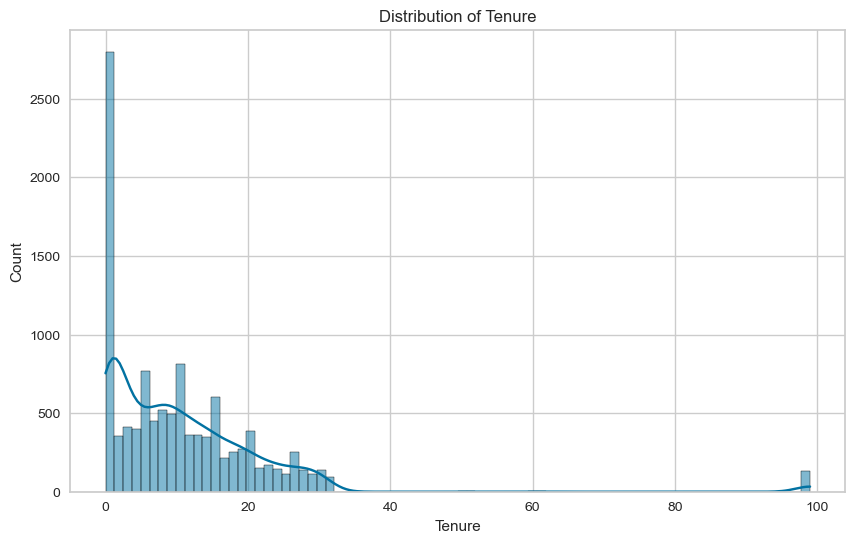

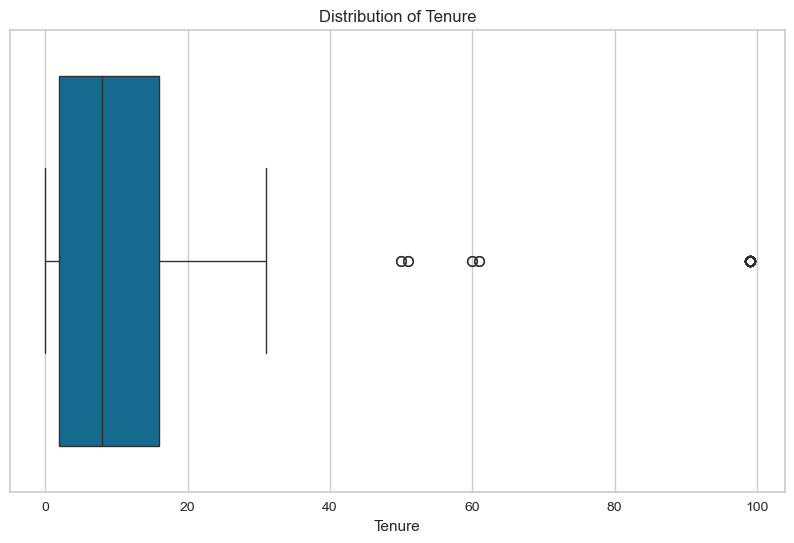

In [69]:
print(f'Median: {round(df.Tenure.median(), 2)}, Mean: {round(df.Tenure.mean(), 2)}')

plt.figure(figsize= (10, 6))
sns.histplot(x = 'Tenure', data = df, kde = True)
plt.title('Distribution of Tenure')
plt.show()

plt.figure(figsize=(10,6))
sns.boxplot(x = 'Tenure', data = df)
plt.title('Distribution of Tenure')
plt.show()

- The plot is Right skewed.
- We can clearluy see that there are few outliers but we can leave it without treating.
- The Mean value is 8 and Median is 10.83.

Median: 163.19, Mean: 194.54


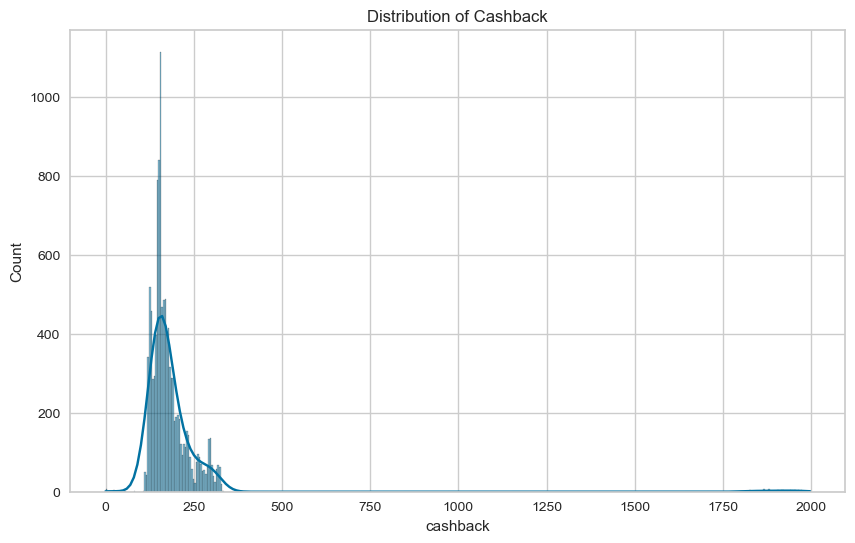

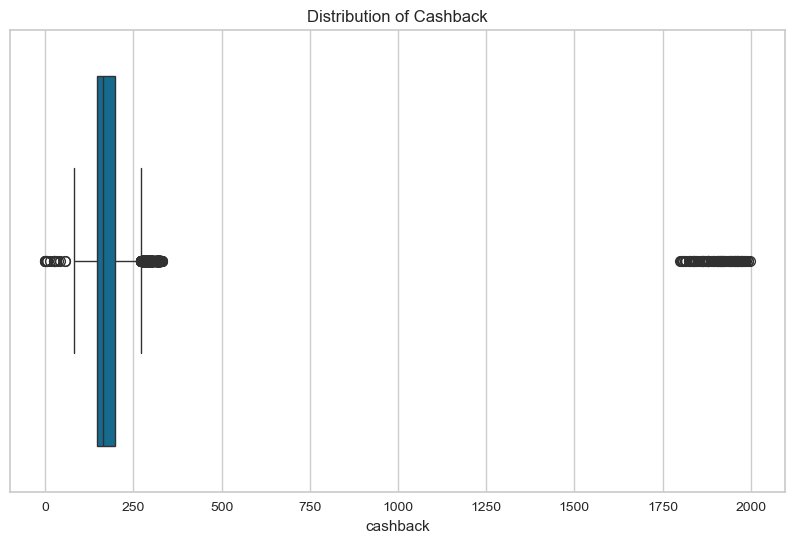

In [70]:
print(f'Median: {round(df.cashback.median(), 2)}, Mean: {round(df.cashback.mean(), 2)}')

plt.figure(figsize= (10, 6))
sns.histplot(x = 'cashback', data = df, kde = True)
plt.title('Distribution of Cashback')
plt.show()

plt.figure(figsize=(10,6))
sns.boxplot(x = 'cashback', data = df)
plt.title('Distribution of Cashback')
plt.show()

- The Most of the data is present between 0 to `$500` with extreme values more than `$1750`.
- We can clearly see there are outliers present in the dataset.
- The median value is somewhere near `$163.20` and the Mean value is `$194.54`.

Median: 16.0, Mean: 17.85


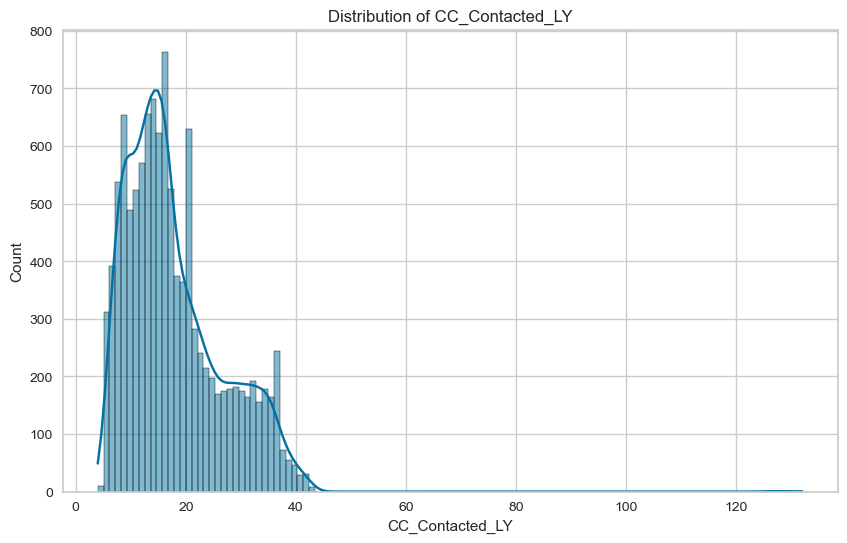

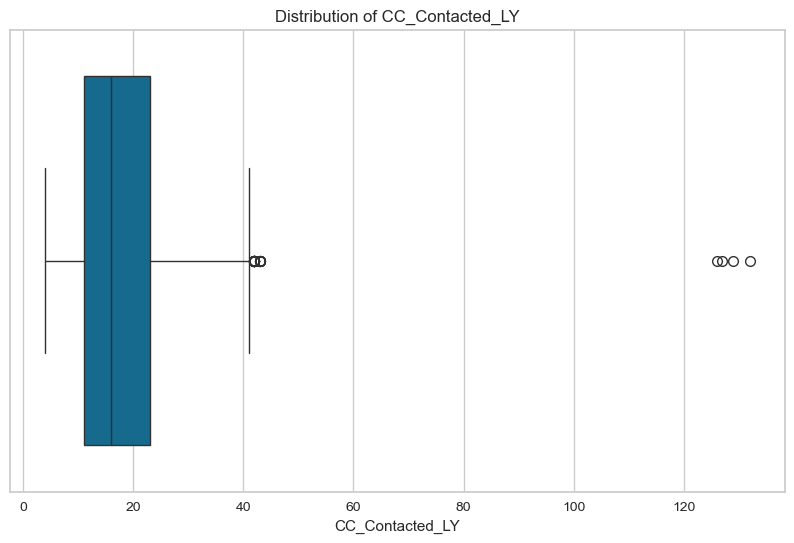

In [71]:
print(f'Median: {round(df.CC_Contacted_LY.median(), 2)}, Mean: {round(df.CC_Contacted_LY.mean(), 2)}')

plt.figure(figsize=(10,6))
sns.histplot(x = 'CC_Contacted_LY', data = df, kde = True)
plt.title('Distribution of CC_Contacted_LY')
plt.show()

plt.figure(figsize=(10,6))
sns.boxplot(x = 'CC_Contacted_LY', data = df)
plt.title('Distribution of CC_Contacted_LY')
plt.show()

- The plot is skewed towards the right.
- We can see some outliers present in the dataset with some extreme values of more than 120 calls last year.
- But we can leave those outlier as it is since in business use case this seems to be valid data.

#### Categorical column

City_Tier
1    7373
3    3405
2     480
Name: count, dtype: int64


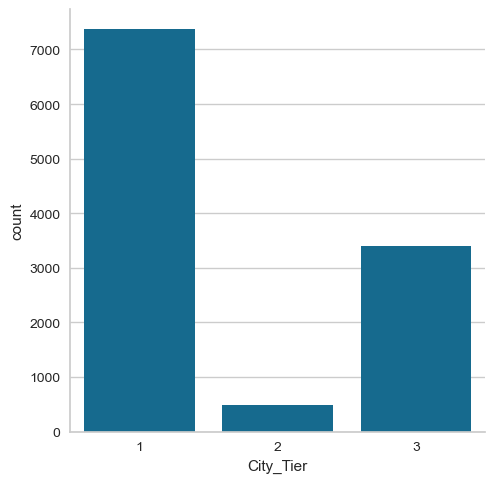

In [72]:
print(df['City_Tier'].value_counts())

sns.catplot(x = 'City_Tier', data = df, kind= 'count')

- The above plot tells us that most of the people are from City tier 1 (7373).
- City tier 3 (3405) stays second .
- There are very less people present in city tier 2 (480).

Churn
0    9362
1    1896
Name: count, dtype: int64


<Axes: xlabel='Churn', ylabel='count'>

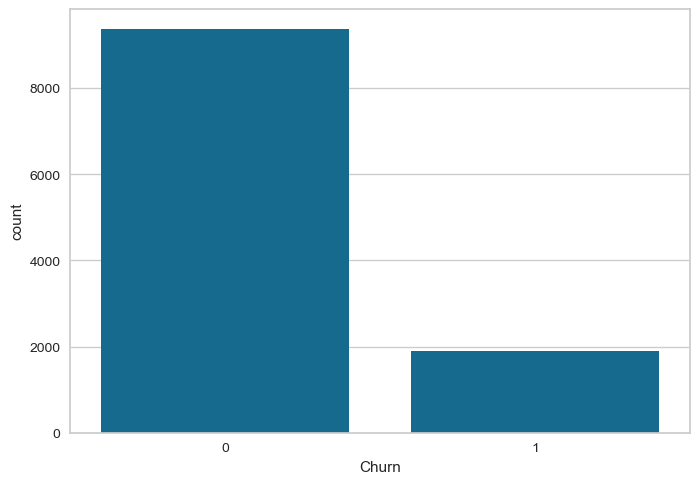

In [73]:
print(df['Churn'].value_counts())


sns.countplot(x = 'Churn' , data = df)

- We can consider 0 as customer not churned and 1 as customer churned.
- The difference is very large as the Numer of customers not churned(9362) > customers not churned(1896).

Gender
M    6810
F    4448
Name: count, dtype: int64


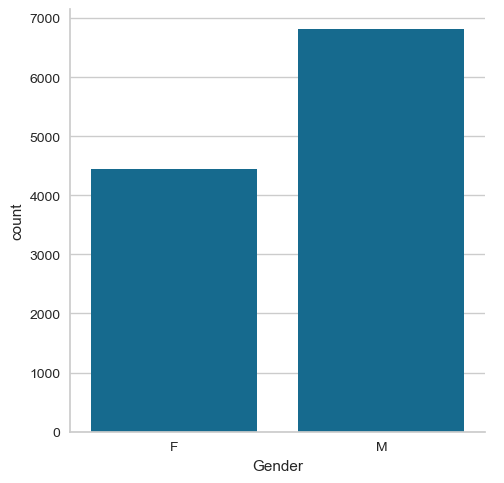

In [74]:
print(df['Gender'].value_counts())

sns.catplot(x = 'Gender', data = df, kind= 'count')

- Male customers(6810) are more is count than female customers(4448).

Payment
Debit Card          4696
Credit Card         3509
E wallet            1217
Cash on Delivery    1014
UPI                  822
Name: count, dtype: int64


<Figure size 1000x600 with 0 Axes>

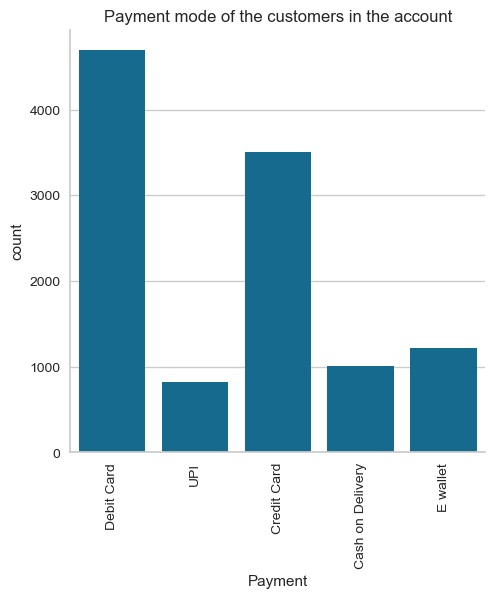

In [75]:
print(df['Payment'].value_counts())

plt.figure(figsize=(10,6))
sns.catplot(x = 'Payment', data = df, kind = 'count')
plt.title('Payment mode of the customers in the account')
plt.xticks(rotation = 90, fontsize = 10)
plt.show()

- Most of the payments are done using `Debit card`(4696) followed by `Credit Card`(3509) > `E wallet`(1217) > `Cash on Delivery`(1014) > `UPI`(822).

Service_Score
3    5587
2    3250
4    2331
1      77
0       8
5       5
Name: count, dtype: int64


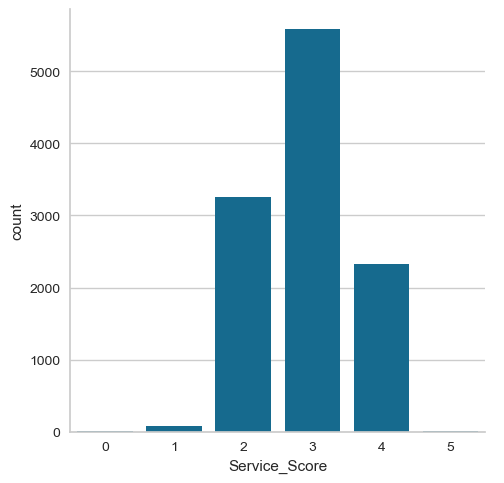

In [76]:
print(df['Service_Score'].value_counts())

sns.catplot(x = 'Service_Score', data = df, kind= 'count')

- We can see that the highest count for Customer Care Service Score is 3 (5587) followed by 2 (3250), 3 (2331), 1 (77), 0 (8), 5 (5).
- From this we can see that most of of the customers have given average rating to the Customer care.

Account_user_count
4    5013
3    3260
5    1699
2     525
1     446
6     315
Name: count, dtype: int64


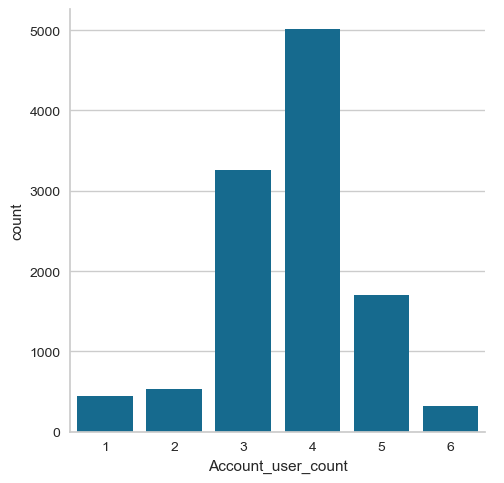

In [77]:
print(df.Account_user_count.value_counts())

sns.catplot(x = 'Account_user_count', data = df, kind = 'count')

- Number of user each account is varies from 1 user to 6 users per account.
- There are 5013 account that has 4 users per account followed by 3 users per account that has a count of 3260 the 5 users per account has a count of 1699, 2 user per account are 525 in count, 1 user per account has a count of 315, 6 users per account are 315 in count.
- We can conclude that most of the account has 4 users per account.

account_segment
Super           4159
Regular Plus    4122
HNI             1639
Super Plus       818
Regular          520
Name: count, dtype: int64


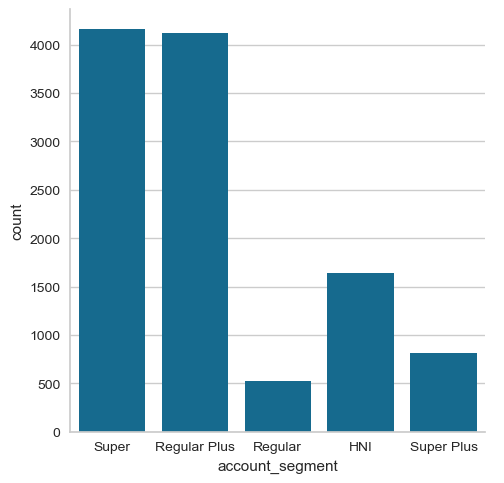

In [78]:
print(df['account_segment'].value_counts())

sns.catplot(x = 'account_segment', data = df, kind = 'count')

- There are 5 types of `accouunt_segment` Super, Regular, HNI, Super Plus, Regular Plus.
- The most popular account_segment is `Super`(4159) followed by `Regular Plus` (4122), `HNI`(1639), `Super Plus`(818) and `Regular`(520)

Marital_Status
Married     6071
Single      3519
Divorced    1668
Name: count, dtype: int64


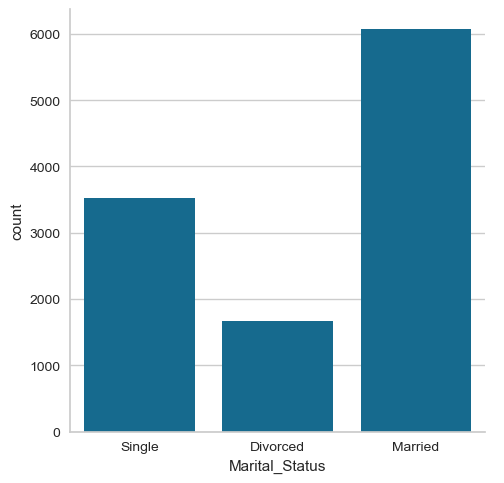

In [79]:
print(df['Marital_Status'].value_counts())

sns.catplot(x = 'Marital_Status', data = df, kind = 'count')

- Most of the peoople who are having the Account are Married(6071) followed by Single(3519), Divorced(1668).

In [80]:
df.head(2)

,Churn,Tenure,City_Tier,CC_Contacted_LY,Payment,Gender,Service_Score,Account_user_count,account_segment,CC_Agent_Score,Marital_Status,Complain_ly,rev_growth_yoy,coupon_used_for_payment,Day_Since_CC_connect,cashback,Login_device,rev_per_year
0,1,4,3,6,Debit Card,F,3,3,Super,2,Single,1,11,1,5,159.93,Mobile,108
1,1,0,1,8,UPI,M,3,4,Regular Plus,3,Single,1,15,0,0,120.90,Mobile,84


Complain_ly
0    8147
1    3111
Name: count, dtype: int64


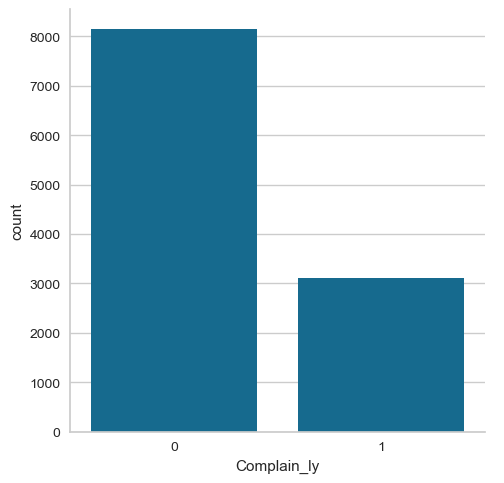

In [81]:
print(df['Complain_ly'].value_counts())

sns.catplot(x = 'Complain_ly', data = df, kind = 'count')

- The plot clearly shows that the last year the number of complaints raised is less.
- Number of accounts that has raised complaints are 3111 and Number of accounts that has not raised complaints are 8147.
  

Median: 15.0, Mean: 16.19


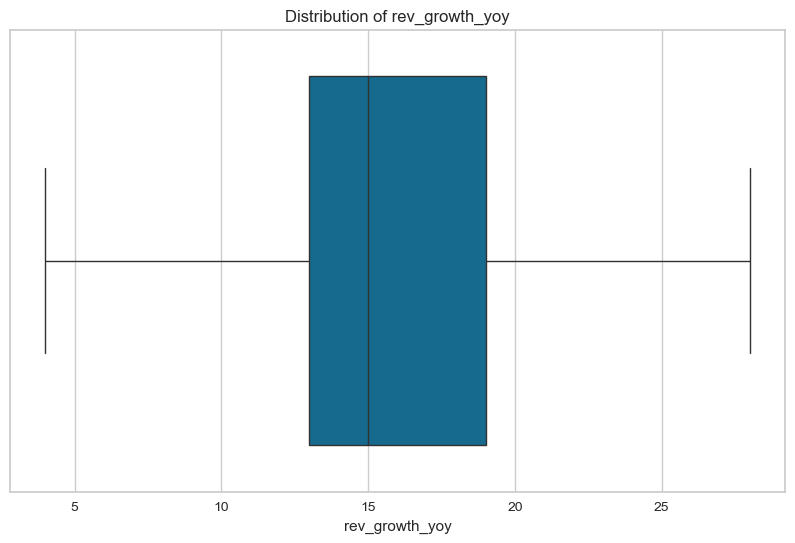

In [82]:
print(f'Median: {round(df.rev_growth_yoy.median(), 2)}, Mean: {round(df.rev_growth_yoy.mean(), 2)}')

plt.figure(figsize=(10,6))
sns.boxplot(x = 'rev_growth_yoy', data = df)
plt.title('Distribution of rev_growth_yoy')
plt.show()

- The Mean value is 16.19 and the median value is 15.
- The Revenue growth year on year column doesn't have any outlier.

coupon_used_for_payment
1    4372
2    2656
0    2149
3     701
4     424
Name: count, dtype: int64


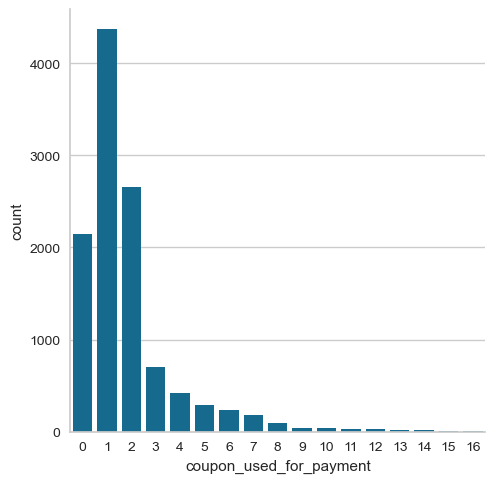

In [83]:
print(df['coupon_used_for_payment'].value_counts().head())

sns.catplot(x = 'coupon_used_for_payment', data = df, kind = 'count')

- Most of the users have used one coupon with a count of (4372) followed by 2 coupons(2656) then 0 coupons(2149) then 3 coupons (701), then 4 coupons (424) these are the top 4 coupon counts by users.

Day_Since_CC_connect
3    2173
2    1573
1    1256
8    1169
0     964
Name: count, dtype: int64


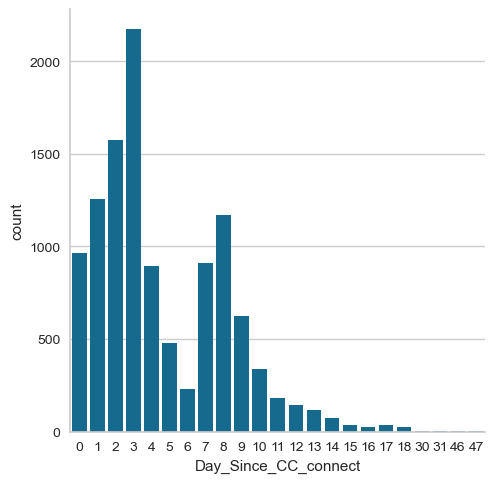

In [84]:
print(df['Day_Since_CC_connect'].value_counts().head())

sns.catplot(x = 'Day_Since_CC_connect', data = df, kind = 'count')

- the top 5 values for day since user connected with customer care are 3 days (2173) followed by 2 days (1573) the 1 day (1256) then 8 days (1169) then 0 days (964). 

Median: 48.0, Mean: 73.52


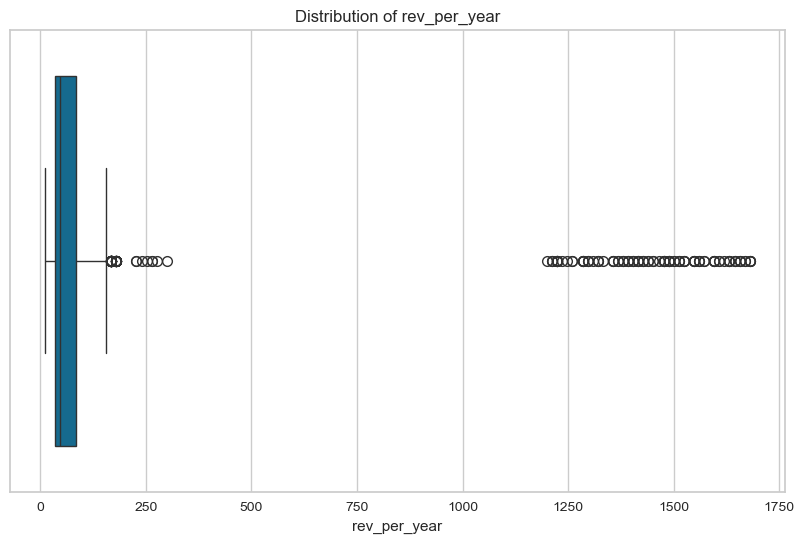

In [85]:
print(f'Median: {round(df.rev_per_year.median(), 2)}, Mean: {round(df.rev_per_year.mean(), 2)}')

plt.figure(figsize=(10,6))
sns.boxplot(x = 'rev_per_year', data = df)
plt.title('Distribution of rev_per_year')
plt.show()

- The Mean value iss 48 amd Median is 73.52.
- We can clearly see that there are lot of outliers in the data but we can't remove them or treat then since they are revenue data.

Login_device
Mobile      8241
Computer    3017
Name: count, dtype: int64


<Axes: xlabel='Login_device', ylabel='count'>

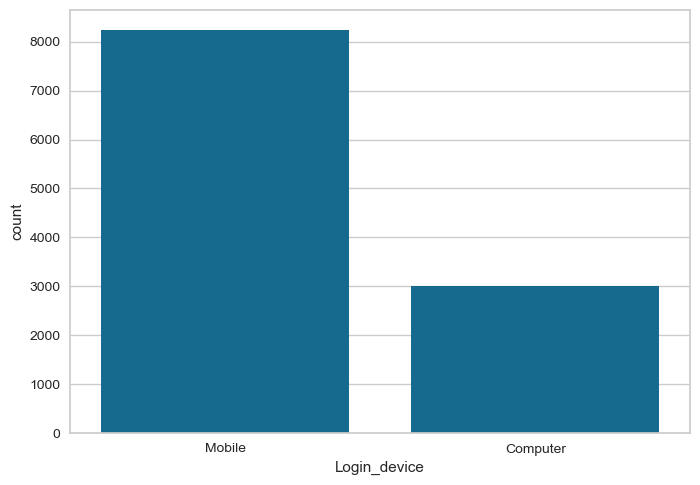

In [86]:
print(df['Login_device'].value_counts())

sns.countplot(x = 'Login_device', data = df)

- Most of the users has logged in through Mobile(8241) than Computer(3017) 

### Bivariate analysis

In [87]:
numeric_cols = df.select_dtypes(include=["number"])

<Axes: >

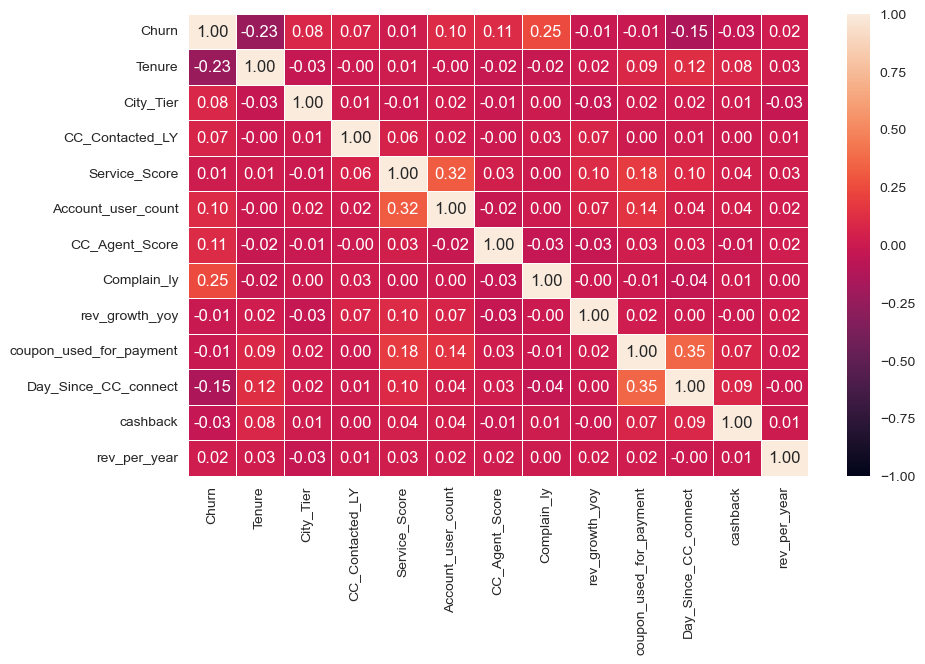

In [88]:
plt.figure(figsize=(10,6)) 
sns.heatmap(numeric_cols.corr(), annot=True, fmt=".2f", linewidths=0.5, vmin= -1, vmax= 1)

- We can see that the `Tenure` and `Churn` are negatively correlated and have a correlation value of -0.23, if the customer's Tenure value is high the there is a less possibility of churning.
- `Complain_ly` column and `Churn` are positively correlated and has a correlation value of 0.25, if the complains are are more for a customer then the customer is more likely going to churn.
- `CC_Agent_Score` is also positively correlated with a correlation value 0.25, this is kind of interesting that might be due to their contact with customer care.
- `Day_Since_CC_connect` is negatively correlated with `Churn` with a value of -0.15, which means if the days since connect with customer care increases the customer churning will also get decrease.
-  `Service_Score` and `Account_user_count` are moderately correlated (0.32), Customers with higher service scores tend to have more accounts. Possibly, users with multiple accounts receive better service or are more engaged.

In [89]:
#sns.pairplot(data = df)

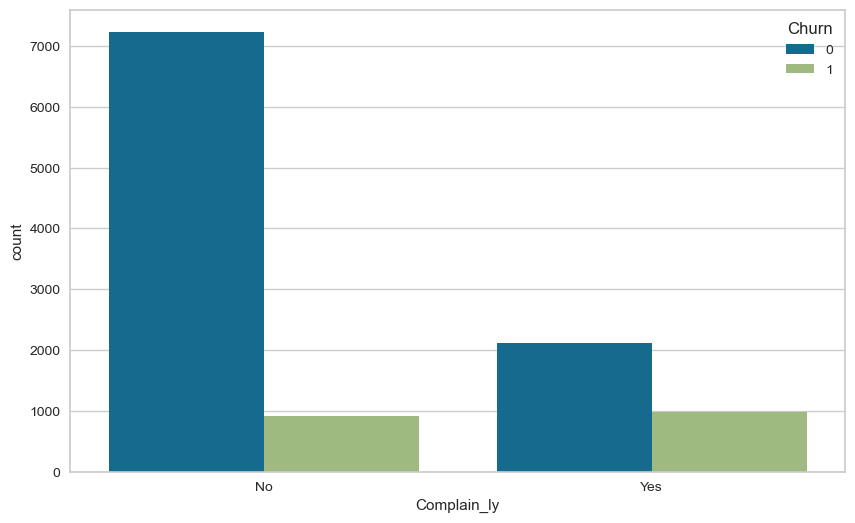

In [90]:
plt.figure(figsize=(10,6))
sns.countplot(x = 'Complain_ly', data = df, hue = 'Churn')

plt.xticks(ticks= [0, 1], labels= ['No', 'Yes'])
plt.show()

- This clearly shows that the customer churn rate is is low when there is No complain.

<Axes: xlabel='Gender', ylabel='count'>

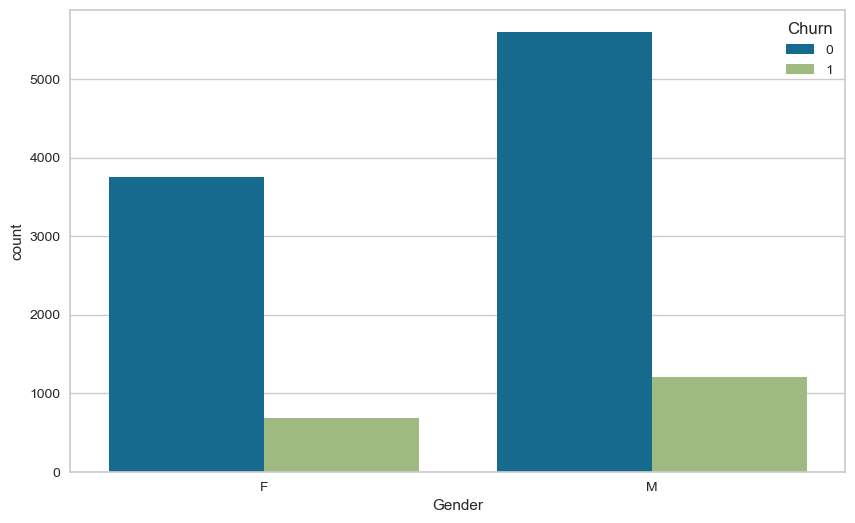

In [91]:
plt.figure(figsize=(10,6))
sns.countplot(x = 'Gender', data = df, hue = 'Churn')

- There is a slight increase in churn count with Male customers than female customers.

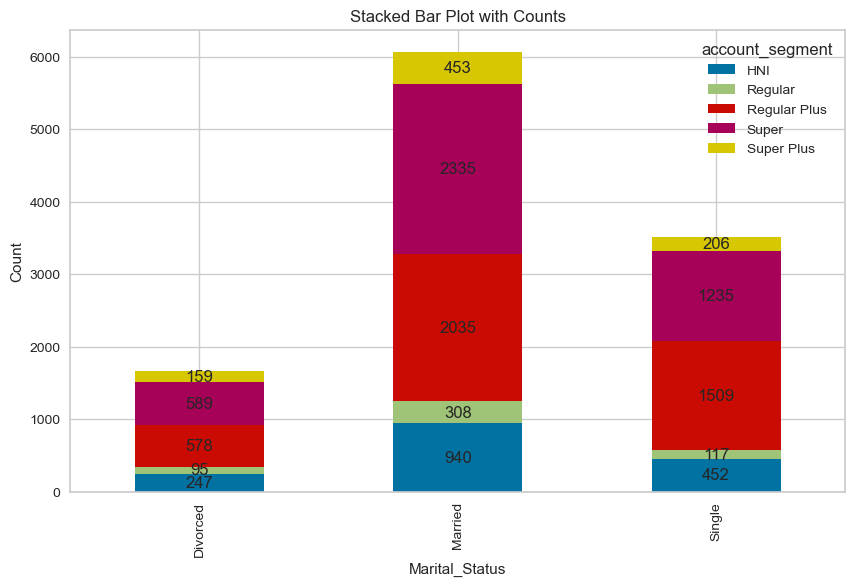

In [92]:
ax = df.groupby(['Marital_Status', 'account_segment']).size().unstack().plot(kind='bar', stacked=True, figsize=(10,6))

for bars in ax.containers:
    ax.bar_label(bars, fmt='%d', label_type='center')  # '%d' for integer counts

# Customize the plot
plt.title("Stacked Bar Plot with Counts")
plt.ylabel("Count")
plt.show()

- Married people mostly prefer Super (2335) and Regular Plus(2305).
- Single people prefer Regular Plus(1509) and Super (1235).
- Divorced people prefer Super(589) and Regular Plus(578)

### Multivariate analysis

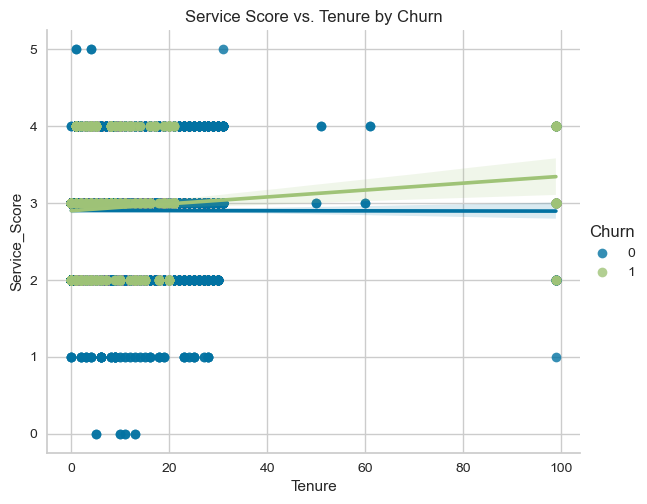

In [93]:
sns.lmplot(x="Tenure", y="Service_Score", hue="Churn", data=df, aspect=1.2)
plt.title("Service Score vs. Tenure by Churn")
plt.show()

- The regression trend lines are relatively flat, indicating little to no correlation between `Tenure` and `Service score`.

Churn             0         1
City_Tier                    
1          0.854469  0.145531
2          0.800000  0.200000
3          0.786490  0.213510


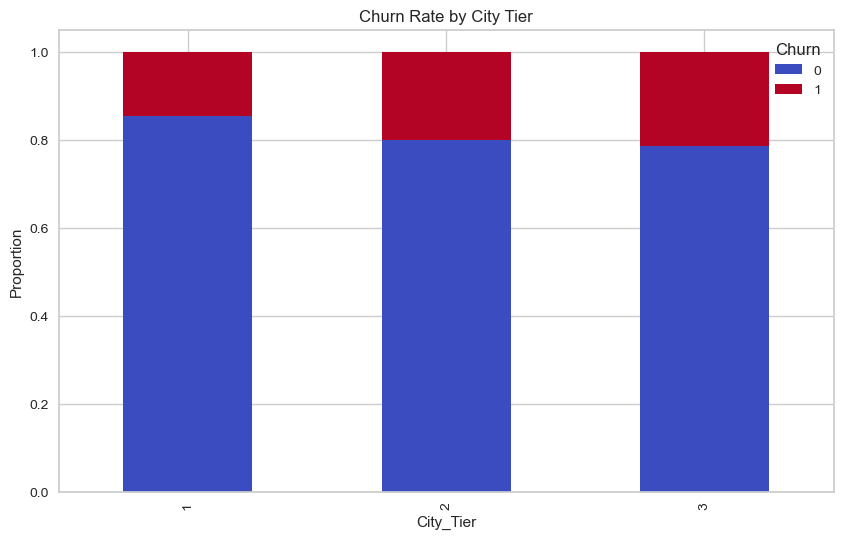

In [94]:
cross_tab = pd.crosstab(df["City_Tier"], df["Churn"], normalize="index")
print(cross_tab)

# Plot stacked bar chart
cross_tab.plot(kind="bar", stacked=True, colormap="coolwarm", figsize=(10,6))
plt.title("Churn Rate by City Tier")
plt.ylabel("Proportion")
plt.show()

- The churning rate is less in City of Tier 1 followed by Tier 2 cities and the Tier 3 cities.

### Clustering analysis

In [95]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(numeric_cols)

In [96]:
scaled_data

array([[ 2.22210794, -0.53258433,  1.48172232, ...,  0.11463133,
        -0.19768242,  0.24947217],
       [ 2.22210794, -0.84437613, -0.70942833, ..., -1.25534689,
        -0.42062927,  0.07580424],
       [ 2.22210794, -0.84437613, -0.70942833, ..., -0.43335996,
        -0.22230197, -0.01102972],
       ...,
       [-0.45002314, -0.76642818, -0.70942833, ..., -0.15936432,
        -0.01780551,  0.07580424],
       [-0.45002314,  0.94842674,  1.48172232, ...,  1.2106139 ,
        -0.08360996,  0.07580424],
       [-0.45002314, -0.22079252, -0.70942833, ..., -0.43335996,
        -0.11137121, -0.09786368]])

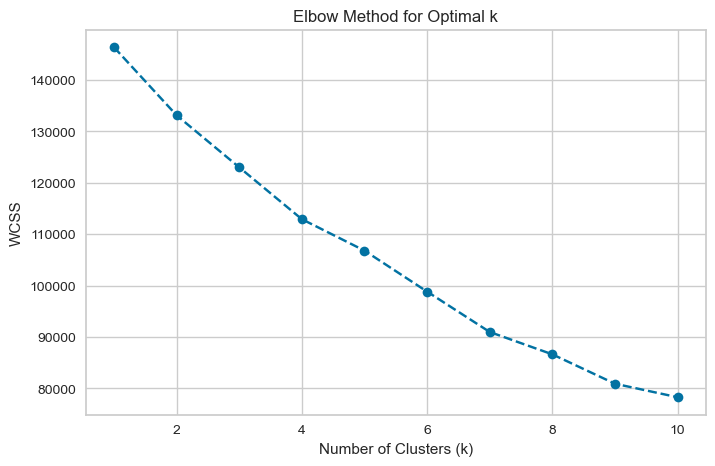

In [97]:
wcss = []

for k in range(1, 11):
    kmeans = KMeans(k, random_state= 42, n_init = 10)
    kmeans.fit(scaled_data)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(8, 5))
plt.plot(range(1, 11), wcss, marker='o', linestyle='--')
plt.xlabel("Number of Clusters (k)")
plt.ylabel("WCSS")
plt.title("Elbow Method for Optimal k")
plt.show()

- Seems like at 4 the line flattens a bit,then it flattens at 7.
- We can consider 4 cluster as optimum value.

For n_clusters = 2, the silhouette score is 0.12394682554870891)
For n_clusters = 3, the silhouette score is 0.08783756047796289)
For n_clusters = 4, the silhouette score is 0.090700402501771)
For n_clusters = 5, the silhouette score is 0.10944239545587754)
For n_clusters = 6, the silhouette score is 0.11885229989729167)
For n_clusters = 7, the silhouette score is 0.10427202858660498)
For n_clusters = 8, the silhouette score is 0.11855084171871336)
For n_clusters = 9, the silhouette score is 0.10608979249170741)
For n_clusters = 10, the silhouette score is 0.11683707111034326)


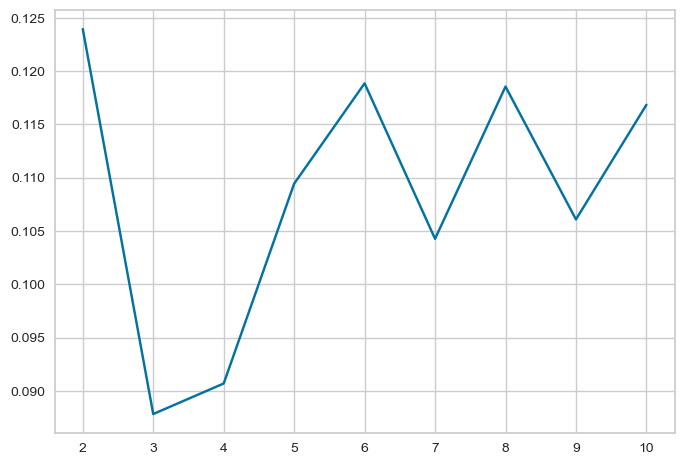

In [98]:
sil_score = []
cluster_list = range(2, 11)
for n_clusters in cluster_list:
    clusterer = KMeans(n_clusters=n_clusters, random_state=1)
    preds = clusterer.fit_predict((scaled_data))
    score = silhouette_score(scaled_data, preds)
    sil_score.append(score)
    print("For n_clusters = {}, the silhouette score is {})".format(n_clusters, score))

plt.plot(cluster_list, sil_score)
plt.show()

- Silhoutte score for 6 clusters in 0.1188 and 8 clusters is 0.1185 but this data consist of outliers so we are to doing silhoutte diagram to find optimum clusters.

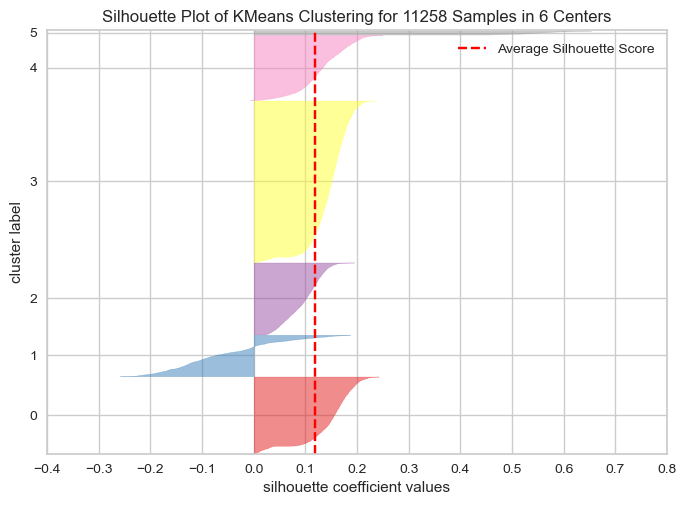

<Axes: title={'center': 'Silhouette Plot of KMeans Clustering for 11258 Samples in 6 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [99]:
# Finding optimal no. of clusters with silhouette coefficients
visualizer = SilhouetteVisualizer(KMeans(6, random_state=1))
visualizer.fit(scaled_data)
visualizer.show()

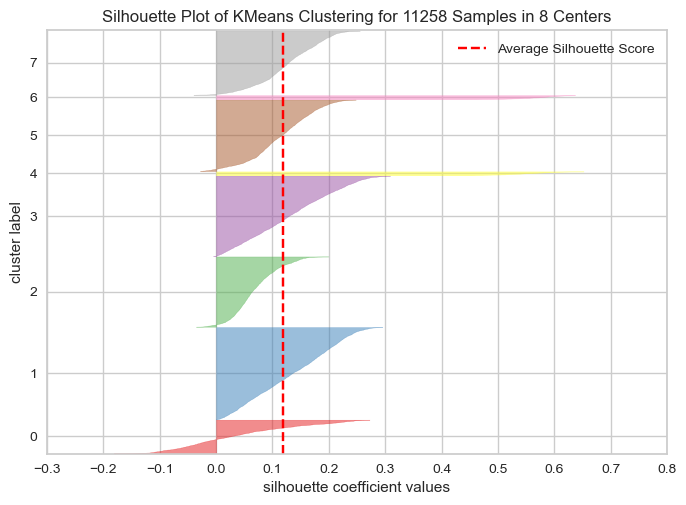

<Axes: title={'center': 'Silhouette Plot of KMeans Clustering for 11258 Samples in 8 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [100]:
# Finding optimal no. of clusters with silhouette coefficients
visualizer = SilhouetteVisualizer(KMeans(8, random_state=1))
visualizer.fit(scaled_data)
visualizer.show()

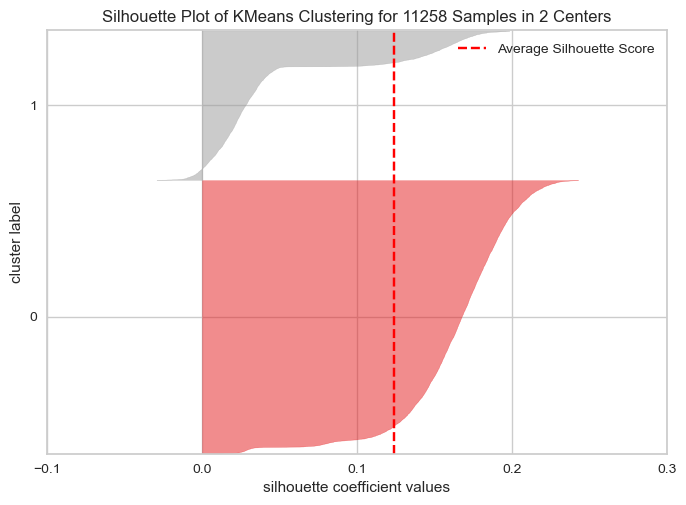

<Axes: title={'center': 'Silhouette Plot of KMeans Clustering for 11258 Samples in 2 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [101]:
# Finding optimal no. of clusters with silhouette coefficients
visualizer = SilhouetteVisualizer(KMeans(2, random_state=1))
visualizer.fit(scaled_data)
visualizer.show()

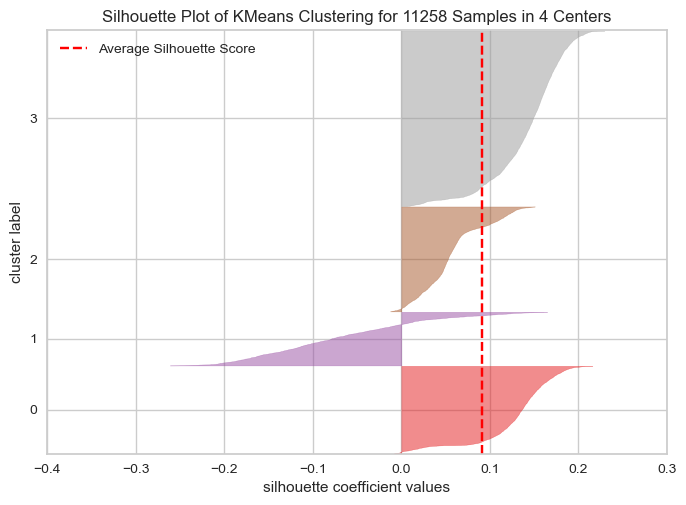

<Axes: title={'center': 'Silhouette Plot of KMeans Clustering for 11258 Samples in 4 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [102]:
# Finding optimal no. of clusters with silhouette coefficients
visualizer = SilhouetteVisualizer(KMeans(4, random_state=1))
visualizer.fit(scaled_data)
visualizer.show()

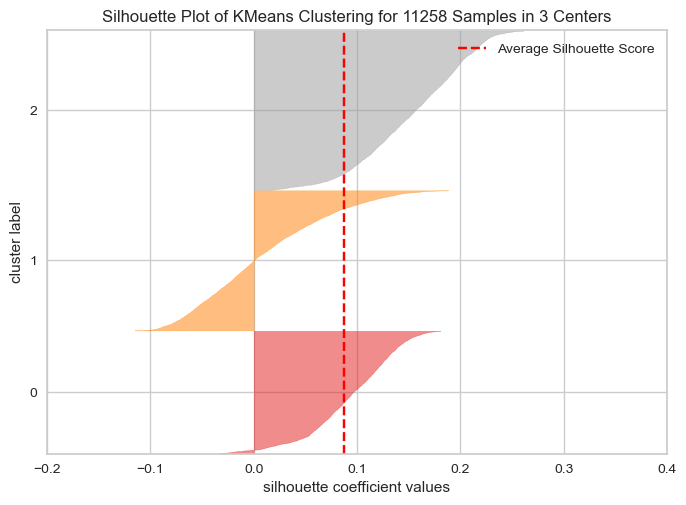

<Axes: title={'center': 'Silhouette Plot of KMeans Clustering for 11258 Samples in 3 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [103]:
# Finding optimal no. of clusters with silhouette coefficients
visualizer = SilhouetteVisualizer(KMeans(3, random_state=1))
visualizer.fit(scaled_data)
visualizer.show()

In [104]:
data1 = df.copy()

In [105]:
kmeans = KMeans(n_clusters=8, random_state=1)
kmeans.fit(scaled_data)

KMeans(random_state=1)

In [106]:
# adding kmeans cluster labels to the original dataframe
data1["KM_segments"] = kmeans.labels_

In [107]:
data1['KM_segments'].value_counts()

KM_segments
1    2471
3    2154
5    1914
2    1883
7    1720
0     903
6     108
4     105
Name: count, dtype: int64

In [108]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_reduced_pca = pca.fit_transform(scaled_data)

# storing results in a dataframe
reduced_data_df_pca = pd.DataFrame(
    data=X_reduced_pca, columns=["Component 1", "Component 2"]
)


<Axes: xlabel='Component 1', ylabel='Component 2'>

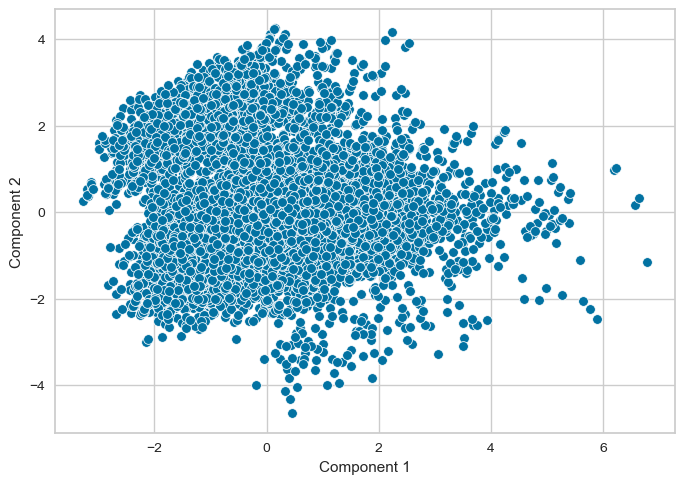

In [109]:
sns.scatterplot(data=reduced_data_df_pca, x="Component 1", y="Component 2")

<Axes: xlabel='Component 1', ylabel='Component 2'>

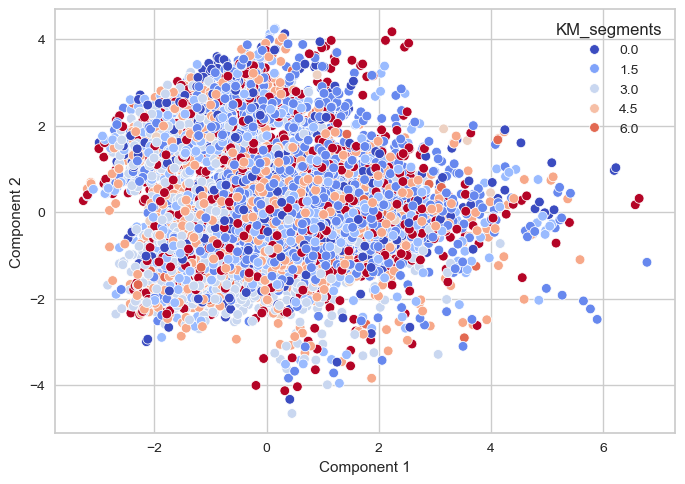

In [110]:
sns.scatterplot(
    data=reduced_data_df_pca,
    x="Component 1",
    y="Component 2",
    hue=data1['KM_segments'],
    palette="coolwarm",
)

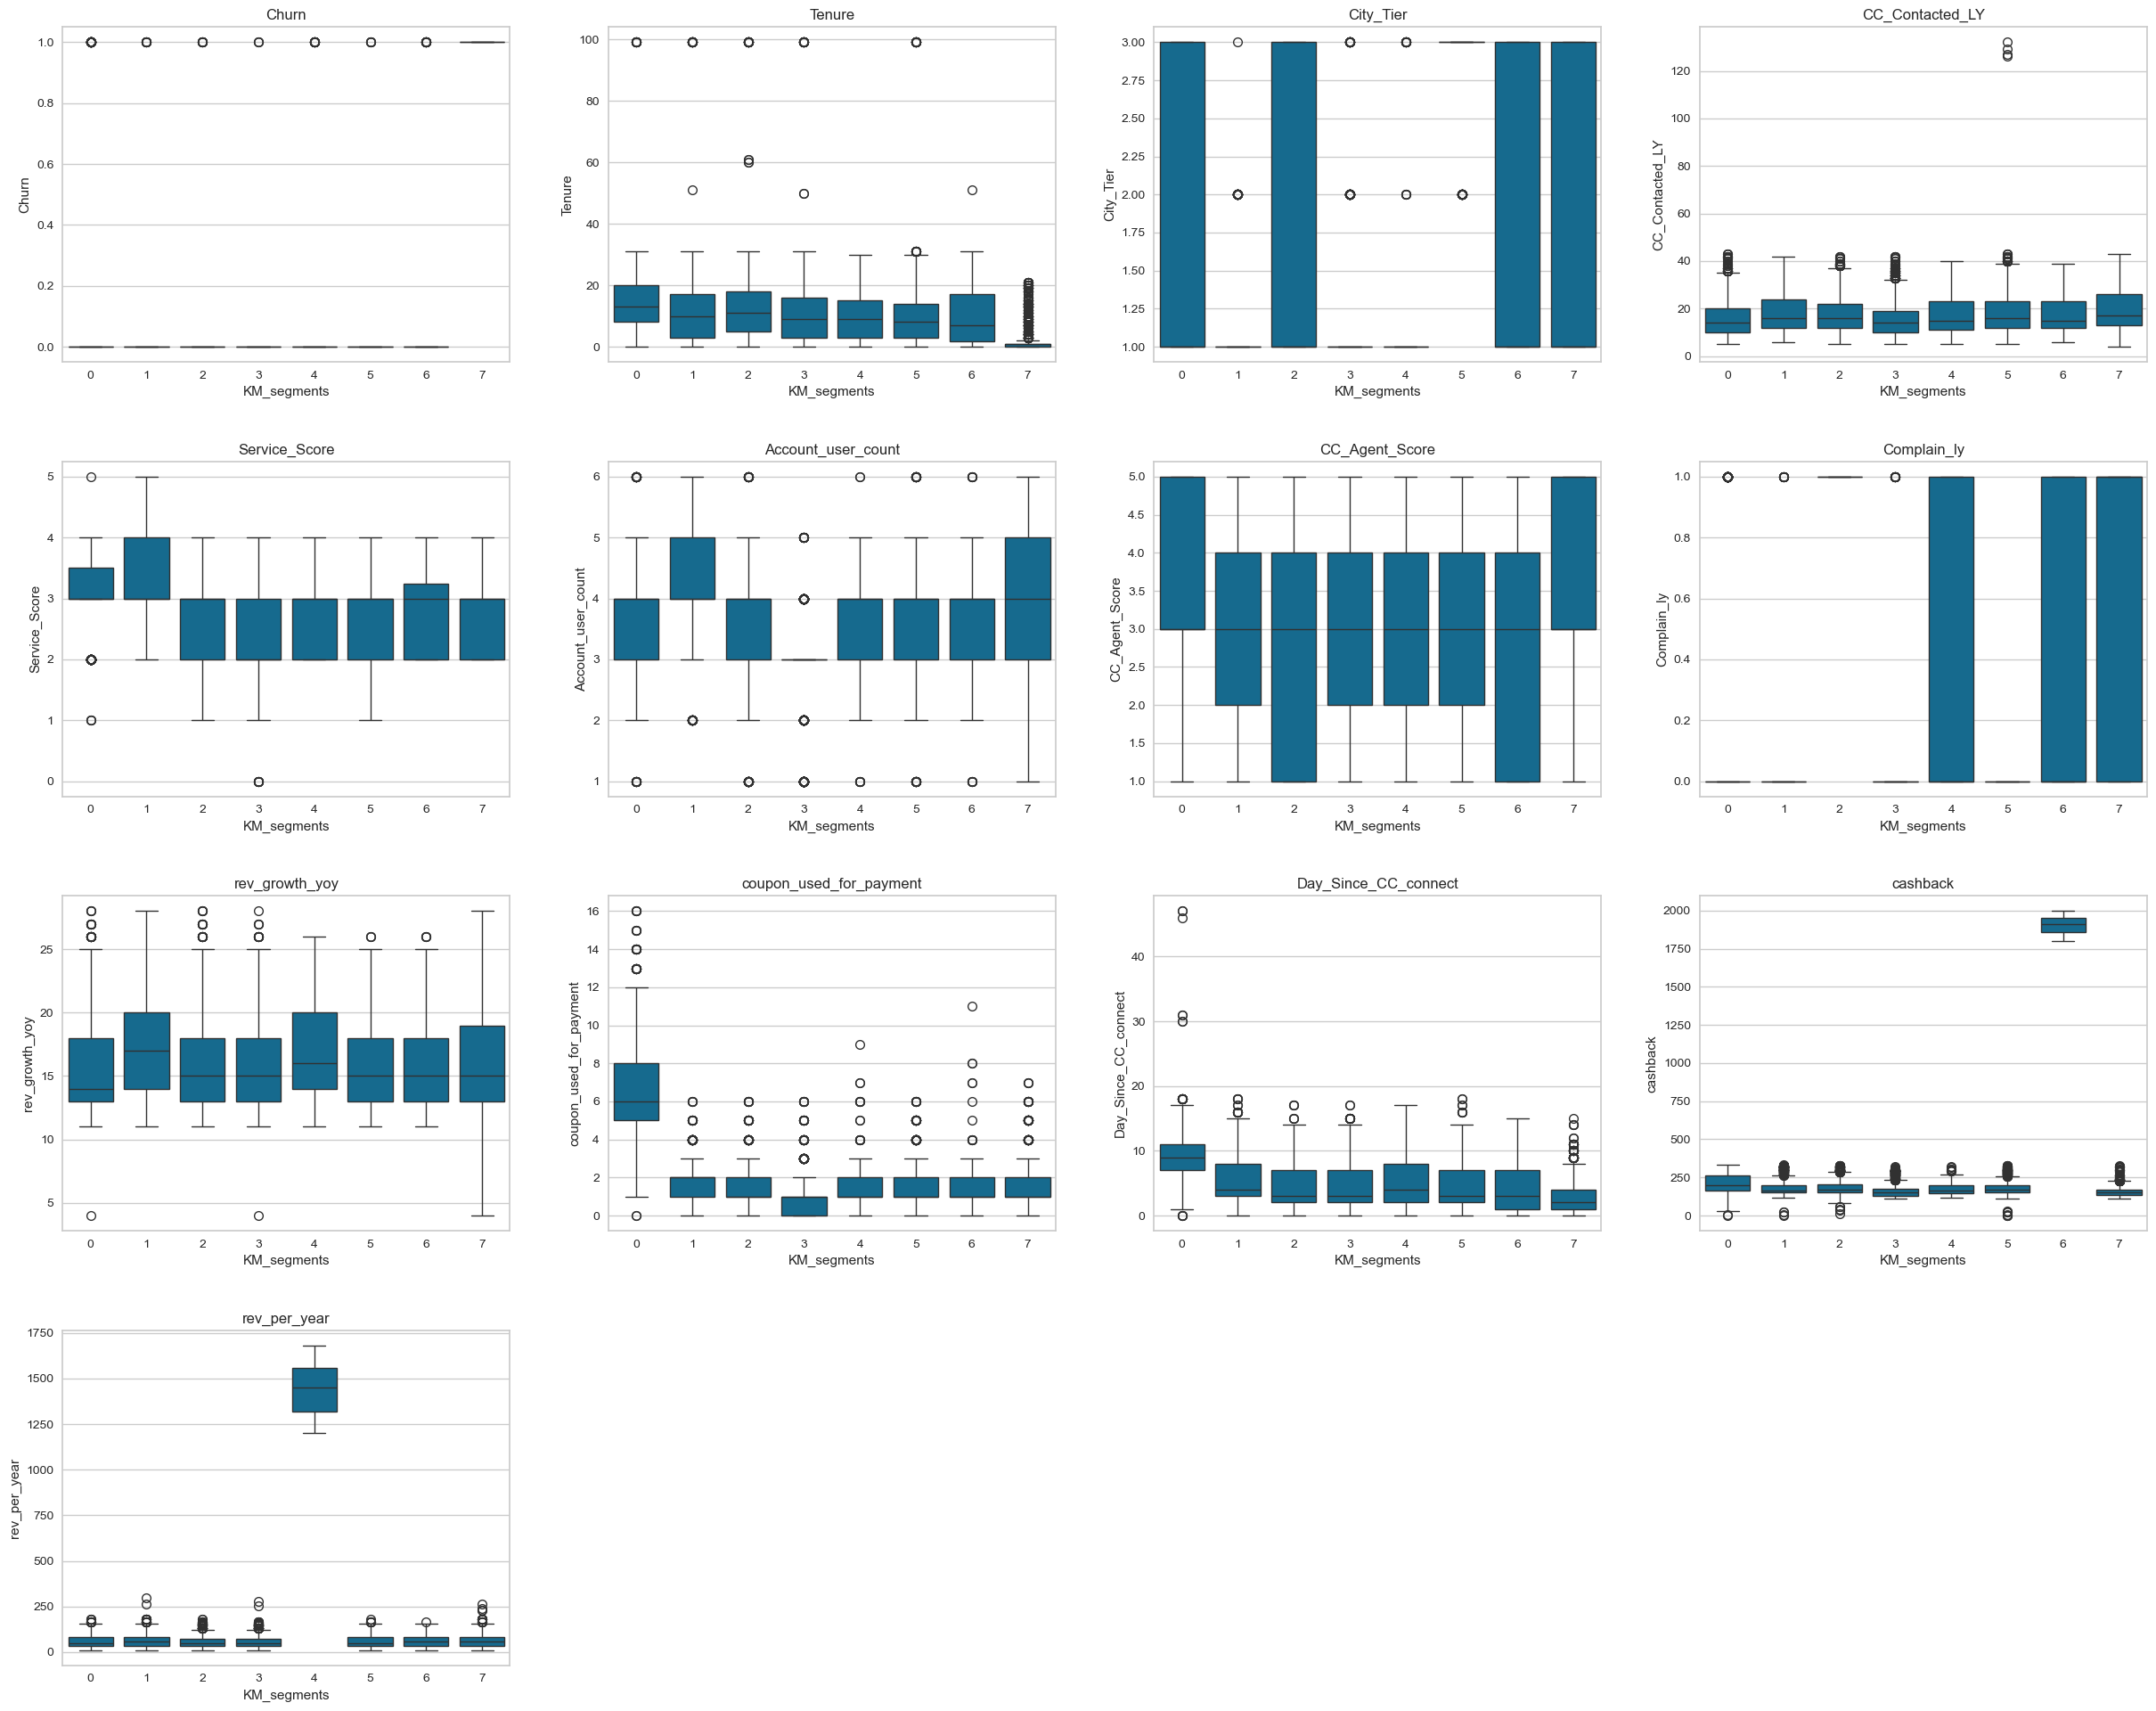

In [111]:
# Ensure only numerical features are used for clustering
numerical_features = data1.select_dtypes(include=['number']).columns.tolist()
numerical_features.remove("KM_segments")  # Exclude the cluster column itself

num_cols = len(numerical_features)  # Number of features
rows = (num_cols // 4) + (num_cols % 4 > 0)  # Dynamically set rows
cols = min(4, num_cols)  # Max 4 columns

# Create subplots
fig, axes = plt.subplots(rows, cols, figsize=(25, 5 * rows))
axes = np.array(axes).reshape(rows, cols)  # Ensure it's a 2D array

counter = 0

for i in range(rows):
    for j in range(cols):
        if counter < num_cols:  # Prevent index errors
            sns.boxplot(
                ax=axes[i][j], 
                y=data1[numerical_features[counter]],  # Feature column
                x=data1["KM_segments"],  # Clustering segment
            )
            axes[i][j].set_title(numerical_features[counter])  # Add title
            counter += 1
        else:
            axes[i][j].set_visible(False)  # Hide unused subplots

fig.tight_layout(pad=3.0)
plt.show()



1. Churn vs. Clusters
•	Some clusters have a higher concentration of churners, while others mostly have retained customers.
•	A particular cluster has churn values close to 1, indicating a high churn risk group.
2. Tenure vs. Clusters
•	Clusters with lower tenure seem to have higher churn, suggesting that newer accounts are more likely to leave.
•	Some clusters with longer tenure have customers who are more stable.
3. City Tier vs. Clusters
•	Some clusters only exist in certain city tiers, indicating that location-based segmentation may play a role in churn behavior.

4. Customer Care Contact (CC_Contacted_LY) vs. Clusters
•	Some clusters have customers who have contacted customer care more frequently, which might indicate dissatisfaction or service issues.
•	High contact frequency could be an early warning sign for churn.
5. Service Score vs. Clusters
•	Service scores vary across clusters, with some clusters having a lower median service score.
•	Clusters with low service scores might be more likely to churn.
6. Account User Count vs. Clusters
•	Some clusters have higher account user counts, meaning those customers have multiple users under one account.
•	Losing accounts with multiple users could have a bigger impact on revenue.
7. Customer Care Agent Score vs. Clusters
•	Certain clusters have lower agent satisfaction scores, which might indicate poor customer service.
•	These clusters should be prioritized for service improvement.
8. Complaints (Complain_LY) vs. Clusters
•	Some clusters have more frequent complaints, correlating with higher churn risk.
•	Addressing complaints proactively might help reduce churn.
9. Revenue Growth (rev_growth_yoy) vs. Clusters
•	Some clusters show negative or low revenue growth, indicating stagnant or declining accounts.
•	These clusters may need retention campaigns to boost spending.
10. Coupon Usage vs. Clusters
•	Some clusters rely heavily on coupons for payments, which could indicate price-sensitive customers.
•	These users might churn if discounts are reduced.
11. Days Since Last CC Contact vs. Clusters
•	Some clusters have long periods without customer care interaction, which could indicate either low engagement or satisfied users.
•	If a segment has high churn and long periods of no contact, proactive engagement strategies should be implemented.
12. Cashback Usage vs. Clusters
•	A specific cluster has very high cashback usage, indicating price-sensitive customers who may leave if cashback offers stop.
•	A targeted cashback-based retention strategy might help.
13. Revenue Per Year vs. Clusters
•	Some clusters have significantly higher revenue per year, meaning they are high-value customers.
•	Retaining these customers is crucial for business profitability.






**Business Insights**

`Churn Risk Factors:` Customers with low tenure, low service scores, and frequent complaints are at the highest risk of churn. Addressing these factors early can improve retention. 

`Revenue Concentration:` A small percentage of high-value customers contribute significantly to revenue. Losing these accounts can have a major financial impact.

`Price Sensitivity:` Many users rely on coupons, cashback, and discounts, making them more likely to switch providers if better deals are available elsewhere.

`Customer Dissatisfaction`: High complaint rates and poor customer support experiences directly correlate with increased churn.

`Dormant or Low-Engagement Accounts:` Customers with low login frequency or long gaps in customer care interactions show disengagement, indicating a potential churn risk.

**Actionable Recommendations**

`Early Churn Detection & Proactive Engagement:` Implement predictive models to identify high-risk customers early and engage them with personalized offers or support.

`Exclusive Benefits for High-Value Customers:` Offer loyalty perks, premium support, and personalized discounts to retain top-tier accounts.

`Balanced Discounts & Retention Strategies:` Target price-sensitive customers with strategic offers (e.g., cashback, subscription bundling) to retain them while maintaining profitability.

`Enhance Customer Service:` Improve complaint resolution times, introduce AI chatbots, and prioritize support for dissatisfied users to reduce churn risk.

`Re-Engagement Campaigns:` Use win-back strategies, gamified loyalty programs, and personalized recommendations for dormant users to drive engagement.

## Data Preparation for modeling

In [112]:
df.head()

,Churn,Tenure,City_Tier,CC_Contacted_LY,Payment,Gender,Service_Score,Account_user_count,account_segment,CC_Agent_Score,Marital_Status,Complain_ly,rev_growth_yoy,coupon_used_for_payment,Day_Since_CC_connect,cashback,Login_device,rev_per_year
0,1,4,3,6,Debit Card,F,3,3,Super,2,Single,1,11,1,5,159.93,Mobile,108
1,1,0,1,8,UPI,M,3,4,Regular Plus,3,Single,1,15,0,0,120.90,Mobile,84
2,1,0,1,30,Debit Card,M,2,4,Regular Plus,3,Single,1,14,0,3,155.62,Mobile,72
3,1,0,3,15,Debit Card,M,2,4,Super,5,Single,0,23,0,3,134.07,Mobile,96
4,1,0,1,12,Credit Card,M,2,3,Regular Plus,5,Single,0,11,1,3,129.60,Mobile,36


In [113]:
cat_cols = ['Payment', 'Gender', 'account_segment', 'Marital_Status', 'Login_device'] 

In [114]:
num_cols = []
for i in df.columns:
    if i not in cat_cols:
        num_cols.append(i)

In [115]:
num_cols

['Churn',
 'Tenure',
 'City_Tier',
 'CC_Contacted_LY',
 'Service_Score',
 'Account_user_count',
 'CC_Agent_Score',
 'Complain_ly',
 'rev_growth_yoy',
 'coupon_used_for_payment',
 'Day_Since_CC_connect',
 'cashback',
 'rev_per_year']

In [116]:
df2 = df.copy()
df2.head()

,Churn,Tenure,City_Tier,CC_Contacted_LY,Payment,Gender,Service_Score,Account_user_count,account_segment,CC_Agent_Score,Marital_Status,Complain_ly,rev_growth_yoy,coupon_used_for_payment,Day_Since_CC_connect,cashback,Login_device,rev_per_year
0,1,4,3,6,Debit Card,F,3,3,Super,2,Single,1,11,1,5,159.93,Mobile,108
1,1,0,1,8,UPI,M,3,4,Regular Plus,3,Single,1,15,0,0,120.90,Mobile,84
2,1,0,1,30,Debit Card,M,2,4,Regular Plus,3,Single,1,14,0,3,155.62,Mobile,72
3,1,0,3,15,Debit Card,M,2,4,Super,5,Single,0,23,0,3,134.07,Mobile,96
4,1,0,1,12,Credit Card,M,2,3,Regular Plus,5,Single,0,11,1,3,129.60,Mobile,36


In [117]:
x = df2.drop(['Churn'], axis= 1)
y = df2.Churn

x = pd.get_dummies(x, columns= ['Payment', 'Gender', 'account_segment', 'Marital_Status', 'Login_device'], drop_first= True)

x = x.astype(float)

x_tmp, x_test, y_tmp, y_test = train_test_split(x, y, test_size=0.2, stratify=y, random_state=42)

y_tmp.reset_index(inplace = True, drop = True)

x_train, x_val, y_train, y_val = train_test_split(x_tmp, y_tmp, test_size= 0.2, stratify= y_tmp, random_state=42)

y_train.reset_index(inplace = True, drop = True)

In [118]:
x_train.head()

,Tenure,City_Tier,CC_Contacted_LY,Service_Score,Account_user_count,CC_Agent_Score,Complain_ly,rev_growth_yoy,coupon_used_for_payment,Day_Since_CC_connect,...,Payment_E wallet,Payment_UPI,Gender_M,account_segment_Regular,account_segment_Regular Plus,account_segment_Super,account_segment_Super Plus,Marital_Status_Married,Marital_Status_Single,Login_device_Mobile
10239,13.0,1.0,22.0,3.0,4.0,3.0,0.0,14.0,2.0,8.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
1457,27.0,2.0,32.0,1.0,1.0,1.0,1.0,12.0,2.0,4.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
4613,1.0,2.0,24.0,3.0,4.0,3.0,1.0,12.0,1.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
6983,11.0,1.0,32.0,2.0,4.0,3.0,0.0,23.0,1.0,8.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
7409,4.0,1.0,17.0,2.0,3.0,4.0,0.0,25.0,0.0,3.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0


In [119]:
print("Shape of Training set : ", x_train.shape)
print("Shape of Validation set : ", x_val.shape)
print("Shape of Test set : ", x_test.shape)
print("Percentage of classes in training set:")
print(y_train.value_counts(normalize=True))
print("Percentage of classes in Validation set:")
print(y_val.value_counts(normalize=True))
print("Percentage of classes in test set:")
print(y_test.value_counts(normalize=True))

Shape of Training set :  (7204, 24)
Shape of Validation set :  (1802, 24)
Shape of Test set :  (2252, 24)
Percentage of classes in training set:
Churn
0    0.831621
1    0.168379
Name: proportion, dtype: float64
Percentage of classes in Validation set:
Churn
0    0.831299
1    0.168701
Name: proportion, dtype: float64
Percentage of classes in test set:
Churn
0    0.831705
1    0.168295
Name: proportion, dtype: float64


In [120]:
def model_performance(model, predictors, target):

  prob_pred = model.predict(predictors)
  class_pred = [1 if i >= 0.5 else 0 for i in prob_pred]
  acc = accuracy_score(target, class_pred)  # to compute Accuracy
  recall = recall_score(target, class_pred)  # to compute Recall
  precision = precision_score(target, class_pred)  # to compute Precision
  f1 = f1_score(target, class_pred)  # to compute F1-score

  # creating a dataframe of metrics
  df_perf = pd.DataFrame(
        {"Accuracy": acc, "Recall": recall, "Precision": precision, "F1": f1,},
        index=[0],
   )
  return df_perf

### Scaling the Dataset

In [121]:
scaler = StandardScaler()

x_train_scaled = pd.DataFrame(scaler.fit_transform(x_train), columns= x_train.columns)
x_val_scaled = pd.DataFrame(scaler.fit_transform(x_val), columns= x_val.columns)
x_test_scaled = pd.DataFrame(scaler.fit_transform(x_test), columns= x_test.columns)

In [122]:
x_val_scaled.head()

,Tenure,City_Tier,CC_Contacted_LY,Service_Score,Account_user_count,CC_Agent_Score,Complain_ly,rev_growth_yoy,coupon_used_for_payment,Day_Since_CC_connect,...,Payment_E wallet,Payment_UPI,Gender_M,account_segment_Regular,account_segment_Regular Plus,account_segment_Super,account_segment_Super Plus,Marital_Status_Married,Marital_Status_Single,Login_device_Mobile
0,0.871755,-0.694637,-0.194504,-1.288194,0.292845,-0.039754,-0.602566,-0.832555,-0.903293,-1.260901,...,-0.341293,-0.274188,0.819521,4.286764,-0.784948,-0.754776,-0.278839,0.944911,-0.681939,0.571797
1,-0.381021,-0.694637,-0.543604,0.127248,-0.735823,0.683848,-0.602566,-0.310451,-0.903293,0.681339,...,-0.341293,-0.274188,0.819521,-0.233276,-0.784948,1.324897,-0.278839,0.944911,-0.681939,0.571797
2,-0.850812,-0.694637,-0.776337,-1.288194,0.292845,-0.039754,1.659568,-0.571503,-0.903293,-1.260901,...,-0.341293,-0.274188,-1.220226,-0.233276,1.273970,-0.754776,-0.278839,0.944911,-0.681939,0.571797
3,-0.381021,-0.694637,-0.892704,-1.288194,-0.735823,0.683848,-0.602566,-0.310451,-0.903293,0.681339,...,-0.341293,-0.274188,0.819521,-0.233276,-0.784948,1.324897,-0.278839,0.944911,-0.681939,-1.748874
4,-0.850812,-0.694637,-0.776337,0.127248,-2.793161,0.683848,-0.602566,-1.354658,0.586851,0.681339,...,-0.341293,-0.274188,-1.220226,-0.233276,-0.784948,-0.754776,-0.278839,-1.058301,1.466407,-1.748874


In [123]:
x_test_scaled.head()

,Tenure,City_Tier,CC_Contacted_LY,Service_Score,Account_user_count,CC_Agent_Score,Complain_ly,rev_growth_yoy,coupon_used_for_payment,Day_Since_CC_connect,...,Payment_E wallet,Payment_UPI,Gender_M,account_segment_Regular,account_segment_Regular Plus,account_segment_Super,account_segment_Super Plus,Marital_Status_Married,Marital_Status_Single,Login_device_Mobile
0,1.305055,-0.724009,0.617140,0.112064,-1.653997,1.376135,-0.641114,-1.135510,0.106954,-0.162126,...,-0.358129,-0.266179,-1.239369,-0.214435,-0.72865,1.243990,-0.281178,0.924675,-0.676465,0.607451
1,-0.448991,1.448501,-0.328784,1.491129,0.316797,-1.521533,-0.641114,-0.593105,-0.394840,-0.432175,...,-0.358129,-0.266179,0.806862,-0.214435,-0.72865,1.243990,-0.281178,0.924675,-0.676465,0.607451
2,0.268573,-0.724009,-0.210544,0.112064,0.316797,-0.072699,-0.641114,0.491705,0.106954,2.538369,...,-0.358129,-0.266179,-1.239369,-0.214435,-0.72865,-0.803865,-0.281178,-1.081461,1.478273,-1.646223
3,-0.448991,-0.724009,1.917787,1.491129,1.302195,-1.521533,-0.641114,2.118920,-0.394840,1.188122,...,-0.358129,-0.266179,0.806862,-0.214435,-0.72865,1.243990,-0.281178,0.924675,-0.676465,0.607451
4,0.348303,-0.724009,2.036027,0.112064,-0.668600,0.651718,-0.641114,-0.864307,0.106954,0.918072,...,-0.358129,-0.266179,0.806862,-0.214435,-0.72865,1.243990,-0.281178,-1.081461,-0.676465,0.607451


### Model building 

### Model building criterion
1. The primary business goal is customer retention → meaning we must identify as many potential churners as possible to take proactive action.
2. Missing a churner (False Negative) means the company loses not just one customer but potentially multiple customers from the same account.
3. Recall ensures we capture most of the actual churners, even if it means some false positives.

### Secondary Metrics:
`F1-Score` → If the business wants a balance between retention cost & accurate targeting.

## Naive Bayes model

### Training dataset

In [124]:
#Build Naive Bayes Model
nb_model = GaussianNB()
nb_model.fit(x_train, y_train)


GaussianNB()

In [125]:
y_train_predict = nb_model.predict(x_train)
y_val_predict = nb_model.predict(x_val)

model_score = nb_model.score(x_train, y_train)
print(model_score)

0.781787895613548


In [126]:
cm = confusion_matrix(y_train, y_train_predict)
cm

array([[4841, 1150],
       [ 422,  791]], dtype=int64)

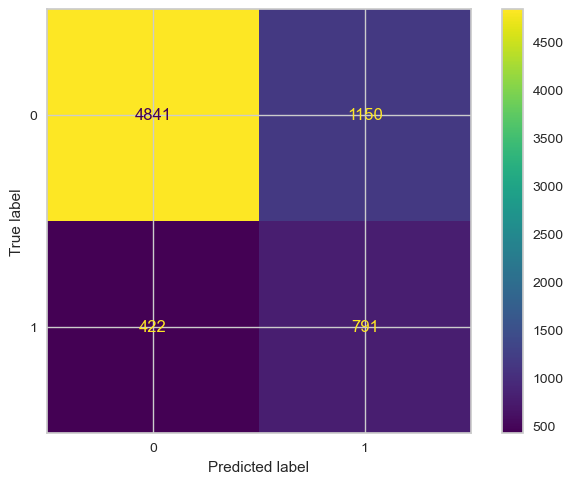

In [127]:
disp = ConfusionMatrixDisplay(confusion_matrix = cm,
                      display_labels=nb_model.classes_)
#disp.plot(cmap="viridis", colorbar=True,im_kw={"linewidths": 0})
#disp.plot(ax=ax, cmap="viridis", colorbar=True)
disp.plot()
plt.show()

- We have created Confusion matrix for train data
- We have TP = 4841 TN = 791 FP = 422 FN = 1150.)

In [128]:
nb_perf_train = model_performance(
    nb_model, x_train, y_train
)
nb_perf_train

,Accuracy,Recall,Precision,F1
0,0.781788,0.652102,0.407522,0.501585


- The recall score and f1-score for Naive Bayes model for training data is 0.652 and 0.501 which is low.

### Testing dataset

In [129]:
model_score = nb_model.score(x_val, y_val)
print(model_score)

0.7874583795782464


In [130]:
cm = confusion_matrix(y_val, y_val_predict)
cm

array([[1210,  288],
       [  95,  209]], dtype=int64)

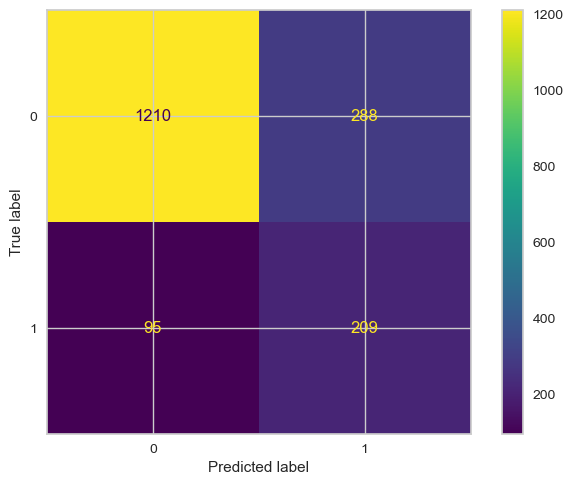

In [131]:
disp = ConfusionMatrixDisplay(confusion_matrix = cm,
                      display_labels=nb_model.classes_

)
disp.plot()
plt.show()

- We have created Confusion matrix for validation data
- We have TP = 1210, TN = 209, FP = 95, FN = 288.

In [132]:
nb_perf_val = model_performance(
    nb_model, x_val, y_val
)
nb_perf_val

,Accuracy,Recall,Precision,F1
0,0.787458,0.6875,0.420523,0.521848


- The recall score and f1-score for Naive Bayes model for validation data is 0.687 and 0.521 which low.

## Ensemble models

In [133]:
models = []

models.append(('Decision tree', DecisionTreeClassifier(random_state= 1, class_weight= 'balanced')))
models.append(('Random forest', RandomForestClassifier(random_state= 1, class_weight='balanced')))
models.append(('Adaboost', AdaBoostClassifier(random_state= 1)))
models.append(('XGboost', XGBClassifier(random_state= 1)))

print('\nTraining dataset scores:')
for name, model in models:
    model.fit(x_train, y_train)
    # recall_score_train = recall_score(y_train ,model.predict(x_train))
    # print(f'{name}: {recall_score_train}')
    print(f'{name}:')
    ensemble_train_perf_over = model_performance(model, x_train, y_train)
    print(ensemble_train_perf_over)

print('\nValidation dataset scores:')
for name, model in models:
    model.fit(x_train, y_train)
    # recall_score_val = recall_score(y_val, model.predict(x_val))
    # print(f'{name}: {recall_score_val}')
    print(f'{name}:')
    ensemble_val_perf_over = model_performance(model, x_val, y_val)
    print(ensemble_val_perf_over)



Training dataset scores:
Decision tree:
   Accuracy  Recall  Precision   F1
0       1.0     1.0        1.0  1.0
Random forest:
   Accuracy  Recall  Precision   F1
0       1.0     1.0        1.0  1.0
Adaboost:
   Accuracy    Recall  Precision        F1
0  0.896308  0.577906   0.748932  0.652396
XGboost:
   Accuracy    Recall  Precision        F1
0  0.999861  0.999176        1.0  0.999588

Validation dataset scores:
Decision tree:
   Accuracy    Recall  Precision        F1
0   0.95172  0.878289   0.842271  0.859903
Random forest:
   Accuracy    Recall  Precision        F1
0  0.963374  0.792763   0.987705  0.879562
Adaboost:
   Accuracy    Recall  Precision       F1
0  0.901221  0.595395   0.766949  0.67037
XGboost:
   Accuracy    Recall  Precision        F1
0  0.968368  0.871711   0.936396  0.902896


In [134]:
print('\nDifference between Training and Validation:')
for name, model in models:
    model.fit(x_train, y_train)
    score_train = recall_score(y_train, model.predict(x_train))
    score_val = recall_score(y_val, model.predict(x_val))
    score_diff = score_train - score_val
    print(f'{name}: \nTraining score: {round(score_train, 4)}, Validation score: {round(score_val, 4)}, Difference:{round(score_diff, 4)}')


Difference between Training and Validation:
Decision tree: 
Training score: 1.0, Validation score: 0.8783, Difference:0.1217
Random forest: 
Training score: 1.0, Validation score: 0.7928, Difference:0.2072
Adaboost: 
Training score: 0.5779, Validation score: 0.5954, Difference:-0.0175
XGboost: 
Training score: 0.9992, Validation score: 0.8717, Difference:0.1275


In [135]:
print('\nDifference between Training and Validation:')
for name, model in models:
    model.fit(x_train, y_train)
    score_train = f1_score(y_train, model.predict(x_train))
    score_val = f1_score(y_val, model.predict(x_val))
    score_diff = score_train - score_val
    print(f'{name}: \nTraining score: {round(score_train, 4)}, Validation score: {round(score_val, 4)}, Difference:{round(score_diff, 4)}')


Difference between Training and Validation:
Decision tree: 
Training score: 1.0, Validation score: 0.8599, Difference:0.1401
Random forest: 
Training score: 1.0, Validation score: 0.8796, Difference:0.1204
Adaboost: 
Training score: 0.6524, Validation score: 0.6704, Difference:-0.018
XGboost: 
Training score: 0.9996, Validation score: 0.9029, Difference:0.0967


## Support Vector Machine

In [136]:
support_vector_classifier = SVC()
support_vector_classifier.fit(x_train_scaled, y_train)

SVC()

In [137]:
y_train_pred = support_vector_classifier.predict(x_train_scaled)
y_val_pred = support_vector_classifier.predict(x_val_scaled)

model_score = support_vector_classifier.score(x_train, y_train)
print(model_score)

0.8316213214880622


### Training data

In [138]:
cm = confusion_matrix(y_train, y_train_pred)
cm

array([[5928,   63],
       [ 407,  806]], dtype=int64)

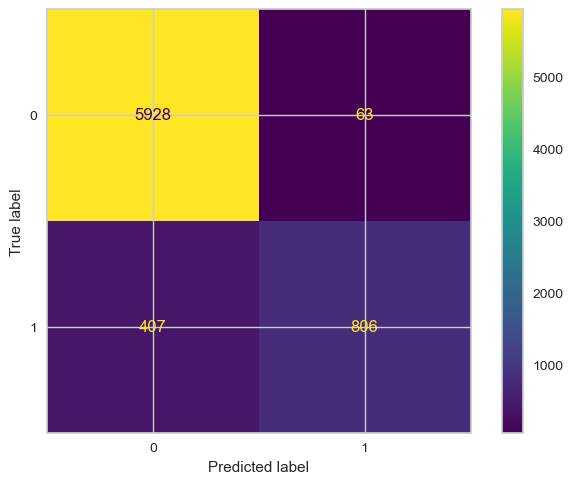

In [139]:
disp = ConfusionMatrixDisplay(confusion_matrix= cm,
                             display_labels= support_vector_classifier.classes_)

disp.plot()
plt.show()

- We have created Confusion matrix for train data
- We have TP = 5928, TN = 806, FP = 407, FN = 63.

In [140]:
svm_train_perf = model_performance(support_vector_classifier, x_train_scaled, y_train)
svm_train_perf

,Accuracy,Recall,Precision,F1
0,0.934758,0.664468,0.927503,0.774256


- The recall and f1-score for SVM model on Training dataset is 0.678 and 0.783.

### Validation data

In [141]:
cm = confusion_matrix(y_val, y_val_pred)
cm

array([[1480,   18],
       [ 127,  177]], dtype=int64)

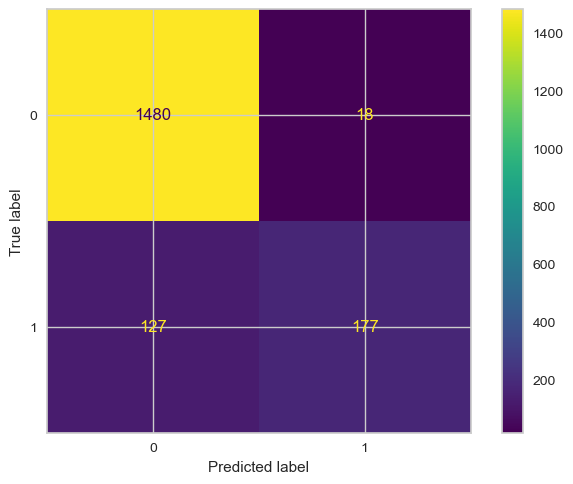

In [142]:
disp = ConfusionMatrixDisplay(confusion_matrix= cm,
                             display_labels= support_vector_classifier.classes_)

disp.plot()
plt.show()

- We have created Confusion matrix for validation data
- We have TP = 1480, TN = 177, FP = 127, FN = 18.

In [143]:
svm_val_perf = model_performance(support_vector_classifier, x_val_scaled, y_val)
svm_val_perf

,Accuracy,Recall,Precision,F1
0,0.919534,0.582237,0.907692,0.709419


- The recall and f1-score for SVM model on Validation dataset is 0.674 and 0.785.

### Oversampling data since the data is imbalanced

In [144]:
print(f"Before Oversampling, count of label 'Will not Churn': {sum(y_train == 0)}")
print(f"Before Overampling, count of label 'Will Churn': {sum(y_train == 1)}")

sm = SMOTE(sampling_strategy= 1, k_neighbors= 5, random_state= 1)
x_train_over, y_train_over = sm.fit_resample(x_train, y_train)

print(f"\nAfter Oversampling, count of label 'Will not Churn' : {sum(y_train_over == 0)}")
print(f"After Oversampling, count of label 'Will Churn' : {sum(y_train_over == 1)}")

print(f"\nAfter Oversampling, Shape of x_train: {x_train.shape}")
print(f"After Oversampling, Shape of y_train: {y_train.shape}")

Before Oversampling, count of label 'Will not Churn': 5991
Before Overampling, count of label 'Will Churn': 1213

After Oversampling, count of label 'Will not Churn' : 5991
After Oversampling, count of label 'Will Churn' : 5991

After Oversampling, Shape of x_train: (7204, 24)
After Oversampling, Shape of y_train: (7204,)


## Model Building with Oversampling data

### Naive Bayes model with Oversampled data

In [145]:
nb_model_over= GaussianNB()
nb_model_over.fit(x_train_over, y_train_over)

GaussianNB()

In [146]:
y_train_pred = nb_model_over.predict(x_train_over)
y_val_pred = nb_model_over.predict(x_val)

model_score = nb_model_over.score(x_train_over, y_train_over)
print(model_score)

0.7227507928559506


### Training dataset

In [147]:
cm = confusion_matrix(y_train_over, y_train_pred)
cm

array([[3552, 2439],
       [ 883, 5108]], dtype=int64)

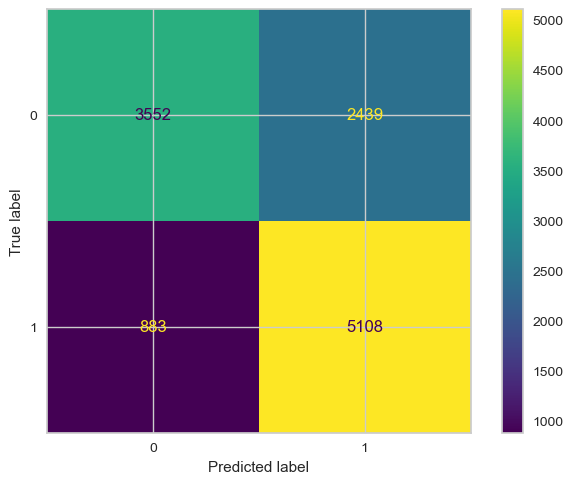

In [148]:
disp = ConfusionMatrixDisplay(confusion_matrix= cm,
                             display_labels= nb_model_over.classes_)

disp.plot()
plt.show()

- We have created Confusion matrix for train data.
- We have TP = 3552, TN = 5108, FP = 883, FN = 2439.

In [149]:
nb_train_perf_over = model_performance(nb_model_over, x_train_over, y_train_over)
nb_train_perf_over

,Accuracy,Recall,Precision,F1
0,0.722751,0.852612,0.676825,0.754617


- The recall value and f1-score for Naive Bayes after Over sampling is 0.852 and 0.754

### Testing dataset

In [150]:
cm = confusion_matrix(y_val, y_val_pred)
cm

array([[893, 605],
       [ 64, 240]], dtype=int64)

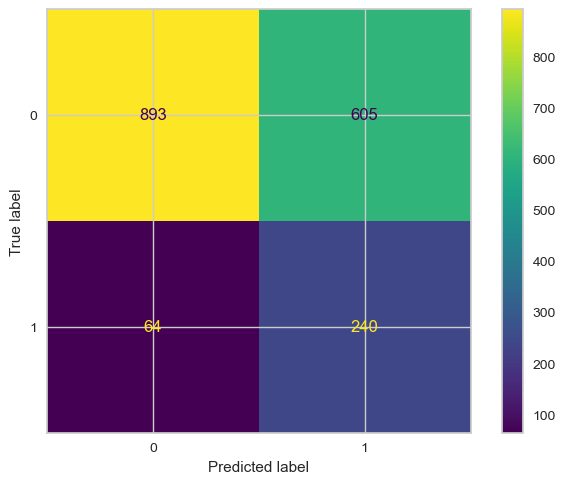

In [151]:
disp = ConfusionMatrixDisplay(confusion_matrix= cm,
                             display_labels= nb_model_over.classes_)
disp.plot()
plt.show()

- We have created Confusion matrix for validation data
- We have TP = 893, TN = 240, FP = 64, FN = 605.

In [152]:
nb_val_perf_over = model_performance(nb_model_over, x_val, y_val)
nb_val_perf_over

,Accuracy,Recall,Precision,F1
0,0.628746,0.789474,0.284024,0.417755


- The recall and f1-score value of Naive Bayes after Oversampling dataset for validation is 0.789 and 0.417

## SVM model for Oversampling dataset 

In [153]:
svm_over = SVC()
svm_over.fit(x_train_over, y_train_over)

SVC()

In [154]:
y_train_pred = svm_over.predict(x_train_over)
y_val_pred = svm_over.predict(x_val)

model_score = svm_over.score(x_train_over, y_train_over)
model_score

0.7512936070772825

### Training Dataset

In [155]:
cm = confusion_matrix(y_train_over, y_train_pred)
cm

array([[3852, 2139],
       [ 841, 5150]], dtype=int64)

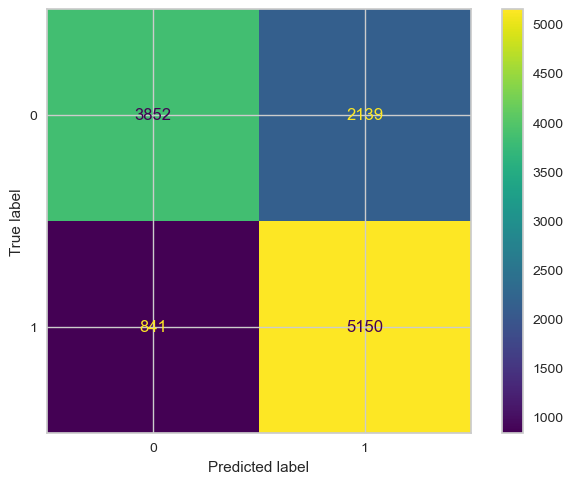

In [156]:
disp = ConfusionMatrixDisplay(confusion_matrix= cm,
                             display_labels= svm_over.classes_)
disp.plot()
plt.show()

- We have created Confusion matrix for train data
- We have TP = 3852, TN = 5150, FP = 841, FN = 2439
  .

In [157]:
svm_train_perf_over = model_performance(svm_over, x_train_over, y_train_over)
svm_train_perf_over

,Accuracy,Recall,Precision,F1
0,0.751294,0.859623,0.706544,0.775602


- The recall value and f1-score value for training data for SVM model after oversampling is 0.859 and 0.775

### Testing dataset

In [158]:
cm = confusion_matrix(y_val, y_val_pred)
cm

array([[966, 532],
       [ 58, 246]], dtype=int64)

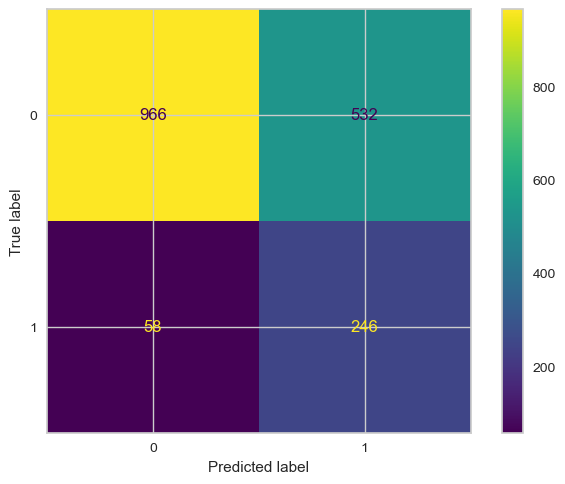

In [159]:
disp = ConfusionMatrixDisplay(confusion_matrix= cm,
                             display_labels= svm_over.classes_)
disp.plot()
plt.show()

- We have created Confusion matrix for validation data
- We have TP = 4841, TN = 966, FP = 58, FN = 532.

In [160]:
svm_val_perf_over = model_performance(svm_over, x_val, y_val)
svm_val_perf_over

,Accuracy,Recall,Precision,F1
0,0.672586,0.809211,0.316195,0.454713


- The recall value and f1-score value for validation data for SVM model after oversampling is 0.809 and 0.454

In [161]:
models = []

models.append(('Decision Tree', DecisionTreeClassifier(random_state=1, class_weight='balanced')))
models.append(('Random Forest', RandomForestClassifier(random_state=1, class_weight='balanced')))
models.append(('Adaboost', AdaBoostClassifier(random_state=1)))
models.append(('XGBoost', XGBClassifier(random_state=1)))

print('\nTraining dataset scores:')
for name, model in models:
    model.fit(x_train_over, y_train_over)
    print(f'{name}:')
    ensemble_train_perf_over = model_performance(model, x_train_over, y_train_over)
    print(ensemble_train_perf_over)

print('\nValidation dataset scores:')
for name, model in models:
    model.fit(x_train_over, y_train_over)
    print(f'{name}:')
    ensemble_val_perf_over = model_performance(model, x_val, y_val)
    print(ensemble_val_perf_over)


Training dataset scores:
Decision Tree:
   Accuracy  Recall  Precision   F1
0       1.0     1.0        1.0  1.0
Random Forest:
   Accuracy  Recall  Precision   F1
0       1.0     1.0        1.0  1.0
Adaboost:
   Accuracy   Recall  Precision        F1
0  0.911784  0.90202   0.919986  0.910914
XGBoost:
   Accuracy  Recall  Precision   F1
0       1.0     1.0        1.0  1.0

Validation dataset scores:
Decision Tree:
   Accuracy    Recall  Precision        F1
0  0.943396  0.848684   0.821656  0.834951
Random Forest:
   Accuracy    Recall  Precision        F1
0  0.967814  0.828947   0.976744  0.896797
Adaboost:
   Accuracy    Recall  Precision        F1
0  0.886792  0.697368   0.654321  0.675159
XGBoost:
   Accuracy    Recall  Precision        F1
0  0.964484  0.855263   0.928571  0.890411


## Hyper parameter tuning

In [162]:
def confusion_matrix_sklearn(model, predictors, target):
    """
    To plot the confusion_matrix with percentages

    model: classifier
    predictors: independent variables
    target: dependent variable
    """
    y_pred = model.predict(predictors)
    cm = confusion_matrix(target, y_pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")


In [163]:
%%time

model = DecisionTreeClassifier(random_state= 1)

param_grid = {    
    "max_depth": np.arange(3, 15),
    "min_samples_split": np.arange(5, 20)
}

scorer = metrics.make_scorer(metrics.f1_score)

randomizedsearch_cv = RandomizedSearchCV(estimator=model, param_distributions=param_grid, n_jobs = -1, n_iter=50, scoring=scorer, cv=5, random_state=1)

randomizedsearch_cv.fit(x_train_over, y_train_over)

print(f"Best parameters are {randomizedsearch_cv.best_params_} with cv score {randomizedsearch_cv.best_score_}")

Best parameters are {'min_samples_split': 7, 'max_depth': 14} with cv score 0.9210341473639216
CPU times: total: 5.11 s
Wall time: 11.1 s


### Training dataset

In [164]:
tuned_dtree = DecisionTreeClassifier(random_state= 1, max_depth= 14, min_samples_split= 7, class_weight= 'balanced')
tuned_dtree.fit(x_train_over, y_train_over)

DecisionTreeClassifier(class_weight='balanced', max_depth=14,
                       min_samples_split=7, random_state=1)

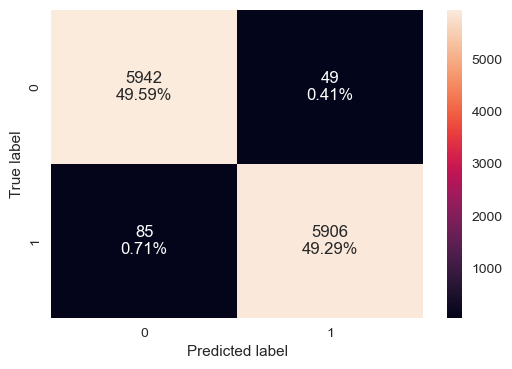

In [165]:
confusion_matrix_sklearn(tuned_dtree, x_train_over, y_train_over)

- We have created Confusion matrix for train data
- We have TP = 5942(49.59%), TN = 5906(49.29%), FP = 85(0.71%), FN = 49(0.41%)

In [166]:
tuned_dtree_train_perf = model_performance(tuned_dtree, x_train_over, y_train_over)
tuned_dtree_train_perf

,Accuracy,Recall,Precision,F1
0,0.988817,0.985812,0.991772,0.988783


- The recall and f1-score for validation dataset for tuned decision tree model is 0.799 and 0.801.

### Validation Dataset

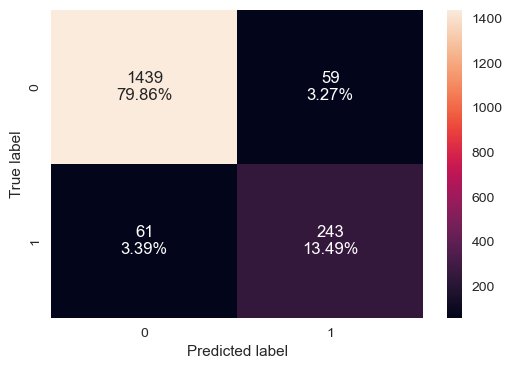

In [167]:
confusion_matrix_sklearn(tuned_dtree, x_val, y_val)

- We have created Confusion matrix for validation data
- We have TP = 1439(79.86%), TN = 243(13.49%), FP = 61(3.39%), FN = 59(3.27%)

In [168]:
tuned_dtree_val_perf = model_performance(tuned_dtree, x_val, y_val)
tuned_dtree_val_perf

,Accuracy,Recall,Precision,F1
0,0.933407,0.799342,0.804636,0.80198


- The recall and f1-score for validation dataset for tuned decision tree model is 0.799 and 0.801.

## Random forest model

In [169]:
%%time
model = RandomForestClassifier(random_state=1)

param_grid = {
    'n_estimators': np.arange(50, 201, 50),
    'max_depth': np.arange(3, 11),
    'min_samples_split': np.arange(5, 11)
}

scorer = metrics.make_scorer(metrics.f1_score)

randomized_search_cv = RandomizedSearchCV(estimator= model, random_state= 1, param_distributions= param_grid, scoring= scorer, cv = 5, n_iter= 50, n_jobs= -1)

randomized_search_cv.fit(x_train_over, y_train_over)

print(f'Best parameters are {randomized_search_cv.best_params_} and their CV score is {randomized_search_cv.best_score_}')

Best parameters are {'n_estimators': 50, 'min_samples_split': 8, 'max_depth': 10} and their CV score is 0.9336046004730651
CPU times: total: 8.14 s
Wall time: 1min 15s


In [170]:
tuned_random_forest = RandomForestClassifier(random_state= 1, n_estimators= 50, min_samples_split= 8, max_depth= 10, class_weight= 'balanced')
tuned_random_forest.fit(x_train_over, y_train_over)

RandomForestClassifier(class_weight='balanced', max_depth=10,
                       min_samples_split=8, n_estimators=50, random_state=1)

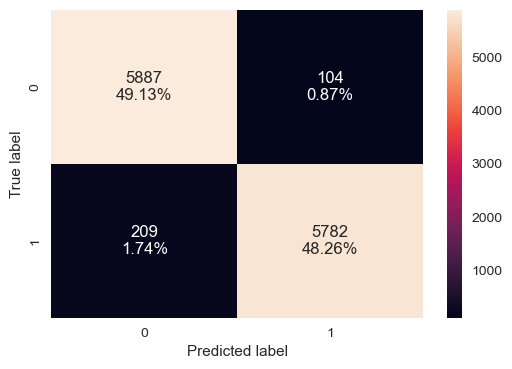

In [171]:
confusion_matrix_sklearn(tuned_random_forest, x_train_over, y_train_over)

- We have created Confusion matrix for train data
- We have TP = 5887(49.13%), TN = 5782(49.26%), FP = 209(1.74%), FN = 104(0.87%)

In [172]:
tuned_rf_train_perf = model_performance(tuned_random_forest, x_train_over, y_train_over)
tuned_rf_train_perf

,Accuracy,Recall,Precision,F1
0,0.973877,0.965114,0.982331,0.973647


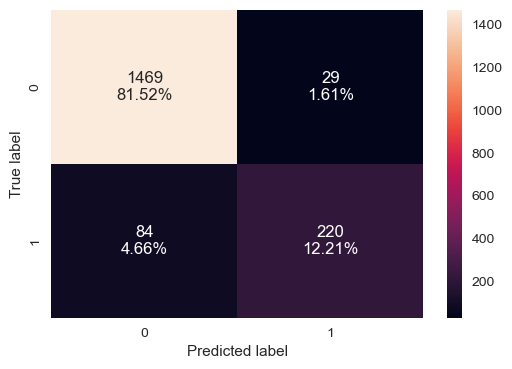

In [173]:
confusion_matrix_sklearn(tuned_random_forest, x_val, y_val)

- We have created Confusion matrix for validation data
- We have TP = 1469(81.52%), TN = 220(12.21%), FP = 84(4.66%), FN = 29(1.61%)

In [224]:
tuned_rf_val_perf = model_performance(tuned_random_forest, x_val, y_val)
tuned_rf_val_perf

,Accuracy,Recall,Precision,F1
0,0.937292,0.723684,0.883534,0.79566


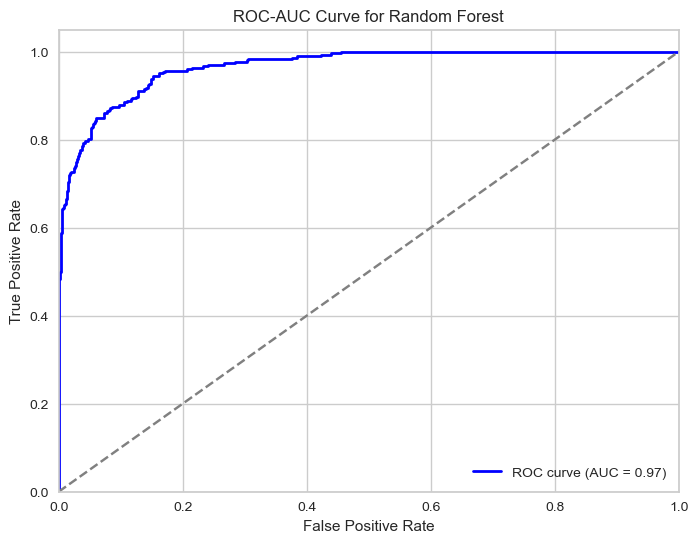

In [177]:
# Get the best model from RandomizedSearchCV
best_model = randomized_search_cv.best_estimator_

# Predict probabilities on test data
y_probs = best_model.predict_proba(x_val)[:, 1]  # Get probability of class 1

# Compute ROC curve and AUC score
fpr, tpr, _ = roc_curve(y_val, y_probs)
roc_auc = auc(fpr, tpr)

# Plot the ROC-AUC curve
plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # Diagonal line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-AUC Curve for Random Forest')
plt.legend(loc="lower right")
plt.show()


## Tuning Adaboost model

In [183]:
%%time
model = AdaBoostClassifier(random_state=1, estimator= DecisionTreeClassifier())

param_grid = {
    "n_estimators": np.arange(50, 201, 50),  # Number of weak learners
    "learning_rate": np.logspace(-2, 0, 5),  # Learning rate (0.01 - 1)
    "estimator__max_depth": np.arange(1, 11)  # Depth of weak learner
}

scorer = metrics.make_scorer(metrics.f1_score)

randomized_search_cv = RandomizedSearchCV(estimator= model, random_state= 1, param_distributions= param_grid, scoring= scorer, cv = 5, n_iter= 50, n_jobs= -1)

randomized_search_cv.fit(x_train_over, y_train_over)

print(f'Best parameters are {randomized_search_cv.best_params_} and their CV score is {randomized_search_cv.best_score_}')

Best parameters are {'n_estimators': 150, 'learning_rate': 0.31622776601683794, 'estimator__max_depth': 10} and their CV score is 0.9603440718089378
CPU times: total: 21.4 s
Wall time: 5min 14s


In [203]:
tuned_adaboost = AdaBoostClassifier(
    random_state= 1, 
    n_estimators= 100, learning_rate= 0.31622776601683794,
    estimator= DecisionTreeClassifier(random_state=1, max_depth= 3)
)

tuned_adaboost.fit(x_train_over, y_train_over)

AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=3,
                                                    random_state=1),
                   learning_rate=0.31622776601683794, n_estimators=100,
                   random_state=1)

### Training Data

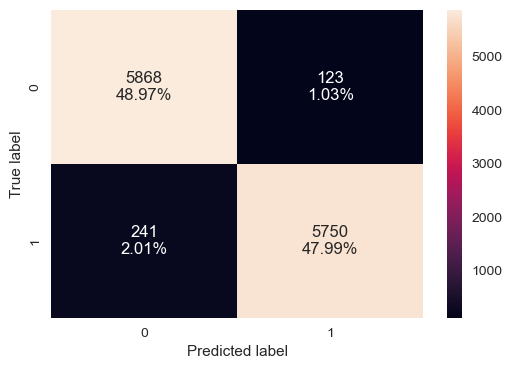

In [204]:
confusion_matrix_sklearn(tuned_adaboost, x_train_over,y_train_over)

- We have created Confusion matrix for train data
- We have TP = 5868(48.91%), TN = 5750(47.99%), FP = 241(2.01%), FN = 123(1.03%)

In [205]:
tuned_adaboost_train = model_performance(tuned_adaboost, x_train_over, y_train_over)
tuned_adaboost_train

,Accuracy,Recall,Precision,F1
0,0.969621,0.959773,0.979057,0.969319


- The recall and f1_score for training dataset for Adaboost model after hyper parameter tuninig is 0.959 and 0.969.

### Validation data

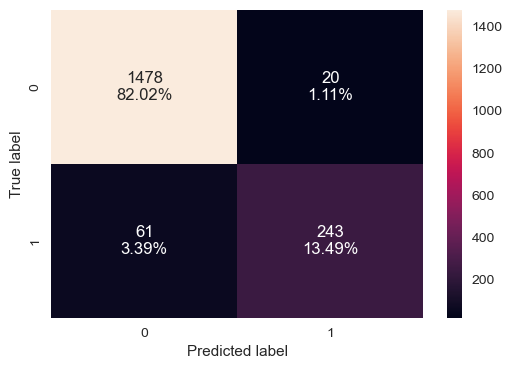

In [202]:
confusion_matrix_sklearn(tuned_adaboost, x_val, y_val)

- We have created Confusion matrix for validation data
- We have TP = 1478(82.02%), TN = 243(13.49%), FP = 61(3.39%), FN = 20(1.11%)

In [201]:
tuned_adaboost_val = model_performance(tuned_adaboost,x_val, y_val)
tuned_adaboost_val

,Accuracy,Recall,Precision,F1
0,0.95505,0.799342,0.923954,0.857143


- The recall and f1_score for Validation dataset for Adaboost model after hyper parameter tuninig is 0.799 and 0.857.

### XG Boost model

In [208]:
%%time
model = XGBClassifier(random_state=1, use_label_encoder=False, eval_metric='logloss')

param_grid = {
    "n_estimators": np.arange(50, 501, 50),  # Try 50–500 trees
    "max_depth": np.arange(3, 11),  # Tree depth 3–10
    "learning_rate": np.logspace(-2, 0, 5),  # Learning rate 0.01–1.0
    "subsample": np.linspace(0.7, 0.9, 3),  # Subsampling ratio 0.7–0.9
}

scorer = metrics.make_scorer(metrics.f1_score)

randomized_search_cv = RandomizedSearchCV(estimator= model, random_state= 1, param_distributions= param_grid, scoring= scorer, cv = 5, n_iter= 50, n_jobs= -1)

randomized_search_cv.fit(x_train_over, y_train_over)

print(f'Best parameters are {randomized_search_cv.best_params_} and their CV score is {randomized_search_cv.best_score_}')

Best parameters are {'subsample': 0.9, 'n_estimators': 100, 'max_depth': 10, 'learning_rate': 0.03162277660168379} and their CV score is 0.9442561272253395
CPU times: total: 20.9 s
Wall time: 1min 49s


In [210]:
tuned_XGboost = XGBClassifier(random_state=1, subsample= 0.9, n_estimators= 100, max_dept= 10, learning_rate= 0.03162277660168379)
tuned_XGboost.fit(x_train_over, y_train_over)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.03162277660168379,
              max_bin=None, max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_dept=10, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, ...)

### Training Dataset

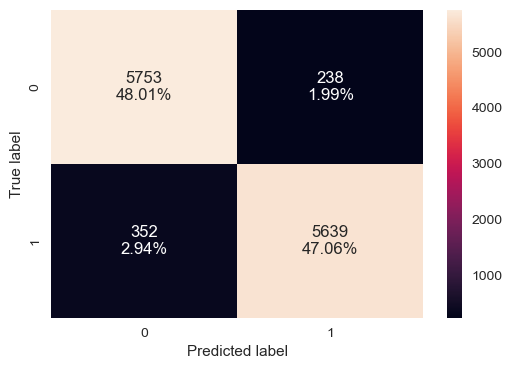

In [228]:
confusion_matrix_sklearn(tuned_XGboost, x_train_over, y_train_over)

- We have created Confusion matrix for train data
- We have TP = 5753(48.01%), TN = 5639(47.06%), FP = 352(2.94%), FN = 238(1.99%)

In [229]:
tuned_xgboost_train = model_performance(tuned_XGboost, x_train_over, y_train_over)
tuned_xgboost_train

,Accuracy,Recall,Precision,F1
0,0.950759,0.941245,0.959503,0.950286


- The recall and f1_score for training dataset for XG Boost model after hyper parameter tuninig is 0.941 and 0.950.

### Validation dataset

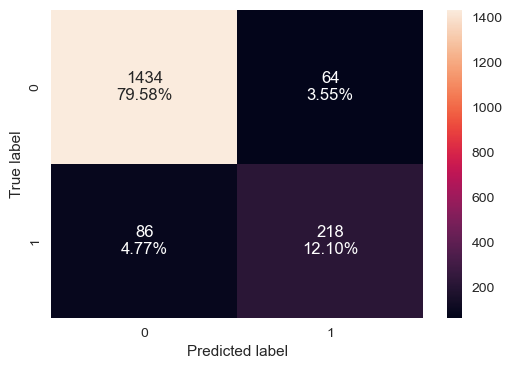

In [230]:
confusion_matrix_sklearn(tuned_XGboost, x_val, y_val)

- We have created Confusion matrix for validation data
- We have TP = 1434(79.58%), TN = 218(12.10%), FP = 86(4.77%), FN = 64(3.55%)

In [231]:
tuned_xgboost_val = model_performance(tuned_XGboost, x_val, y_val)
tuned_xgboost_val

,Accuracy,Recall,Precision,F1
0,0.916759,0.717105,0.77305,0.744027


- The recall and f1_score for Validation dataset for XG Boost model after hyper parameter tuninig is 0.717 and 0.744.

## Scores for all the Tuned models 

In [232]:
# training performance comparison

models_train_comp_df = pd.concat(
    [
        nb_train_perf_over.T,
        svm_train_perf_over.T,
        tuned_dtree_train_perf.T,
        tuned_rf_train_perf.T,
        tuned_adaboost_train.T,
        tuned_xgboost_train.T
    ],
    axis=1,
)
models_train_comp_df.columns = [
    "Naive Bayes model",
    "Support Vector Classifier",
    "Decision Tree Classifier",
    "Random Forest Classifier",
    "Adaboost Classifier",
    "XG Boost Classifier",
]
print("Training performance comparison:")
models_train_comp_df

Training performance comparison:


,Naive Bayes model,Support Vector Classifier,Decision Tree Classifier,Random Forest Classifier,Adaboost Classifier,XG Boost Classifier
Accuracy,0.722751,0.751294,0.988817,0.973877,0.969621,0.950759
Recall,0.852612,0.859623,0.985812,0.965114,0.959773,0.941245
Precision,0.676825,0.706544,0.991772,0.982331,0.979057,0.959503
F1,0.754617,0.775602,0.988783,0.973647,0.969319,0.950286


In [235]:
# training performance comparison

models_train_comp_df = pd.concat(
    [
        nb_val_perf_over.T,
        svm_val_perf_over.T,
        tuned_dtree_val_perf.T,
        tuned_rf_val_perf.T,
        tuned_adaboost_val.T,
        tuned_xgboost_val.T
    ],
    axis=1,
)
models_train_comp_df.columns = [
    "Naive Bayes model",
    "Support Vector Classifier",
    "Decision Tree Classifier",
    "Random Forest Classifier",
    "Adaboost Classifier",
    "XG Boost Classifier",
]
print("Validation performance comparison:")
models_train_comp_df

Validation performance comparison:


,Naive Bayes model,Support Vector Classifier,Decision Tree Classifier,Random Forest Classifier,Adaboost Classifier,XG Boost Classifier
Accuracy,0.628746,0.672586,0.933407,0.937292,0.955050,0.916759
Recall,0.789474,0.809211,0.799342,0.723684,0.799342,0.717105
Precision,0.284024,0.316195,0.804636,0.883534,0.923954,0.773050
F1,0.417755,0.454713,0.801980,0.795660,0.857143,0.744027


- We are choosing Adaboost and XG boost classifier as the best model, and test them in the test data.

## Final model selection

### Using Adaboost model on Testing data

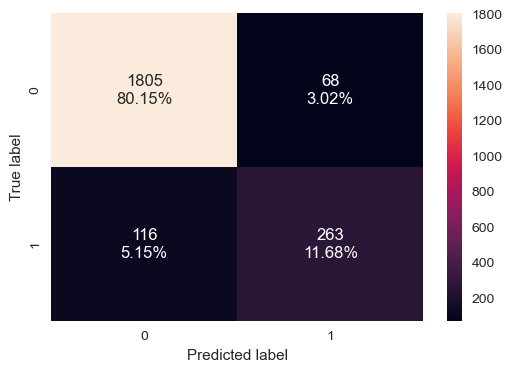

In [238]:
confusion_matrix_sklearn(tuned_adaboost, x_test, y_test)

- We have created Confusion matrix for test data
- We have TP = 1805(80.15%), TN = 263(11.68%), FP = 116(5.15%), FN = 68(3.02%)

In [240]:
ada_test = model_performance(tuned_adaboost, x_test, y_test)
ada_test

,Accuracy,Recall,Precision,F1
0,0.918295,0.693931,0.794562,0.740845


- Adaboost model has recall score of 0.69 and f1-score of 0.74 which is good so adaboost model works well in test data.

### Using XG Boost model on test data

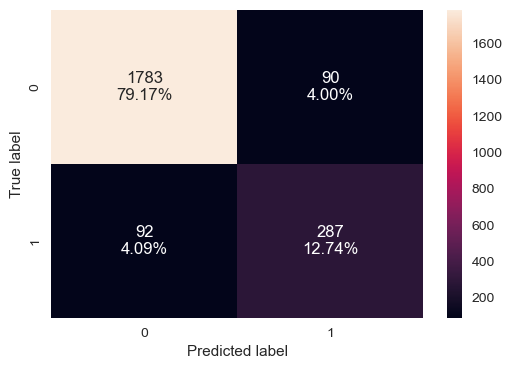

In [241]:
confusion_matrix_sklearn(tuned_XGboost, x_test, y_test)

- We have created Confusion matrix for test data
- We have TP = 1783(97.17%), TN = 287(12.74%), FP = 92(4.09%), FN = 90(4.00%)

In [243]:
xgb_test = model_performance(tuned_XGboost, x_test, y_test)
xgb_test

,Accuracy,Recall,Precision,F1
0,0.919183,0.757256,0.761273,0.759259


- XGBoost model have good recall and f1-score when compared to adaboost on test data so we are finalising XGboost model for Production.



**Final Model selection:**
- Since Recall & F1-score are our priority, XGBoost is the best choice for your case

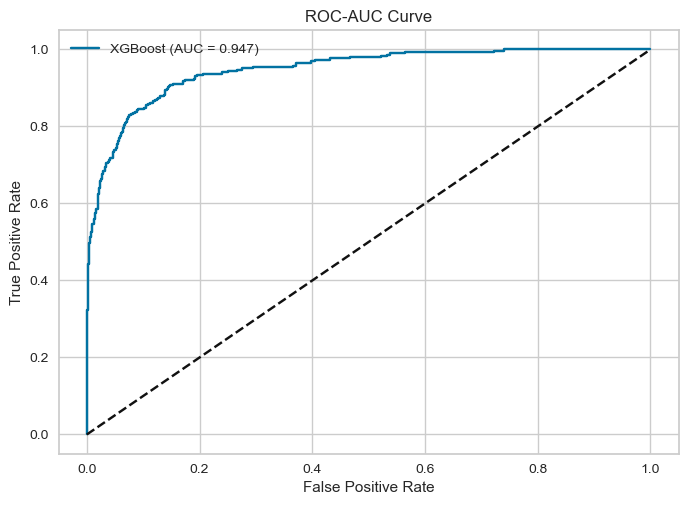

In [244]:
y_pred_proba = tuned_XGboost.predict_proba(x_val)[:, 1]
fpr, tpr, _ = roc_curve(y_val, y_pred_proba)
roc_auc = auc(fpr, tpr)

plt.plot(fpr, tpr, label=f"XGBoost (AUC = {roc_auc:.3f})")
plt.plot([0, 1], [0, 1], "k--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC-AUC Curve")
plt.legend()
plt.show()

<Axes: title={'center': 'Feature Importance'}>

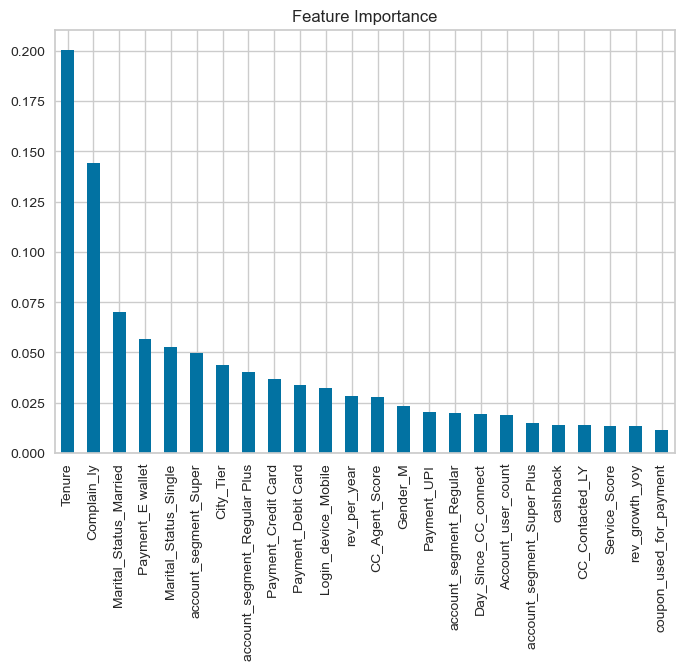

In [246]:
feature_importance = pd.Series(tuned_XGboost.feature_importances_, index=x_train_over.columns)
feature_importance.sort_values(ascending=False).plot(kind='bar', title="Feature Importance")

- We can see that the features `Tenure`, `Complain_LY`, `Maritial_status_Married`, `Payment_E_wallet` and `account_segement_Super` are some of the most important features for XG Boost model